In [94]:
# Importiing necessary library

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from tqdm import tqdm
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import recall_score
from sklearn.metrics import roc_curve, auc,confusion_matrix, accuracy_score, roc_auc_score
from urllib.request import urlopen

In [95]:
# Assigning Data file on df variable and printing first 5 rows of the data set.

data=pd.read_csv('Data.csv')
data.head(5)

,destination,passanger,weather,temperature,coupon,expiration,gender,age,maritalStatus,has_children,education,occupation,income,car,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Accept(Y/N?)
0,No Urgent Place,Alone,Sunny,55,Restaurant(<20),1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,Coffee House,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,Carry out & Take away,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,Coffee House,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,Coffee House,1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,1,0,0,1,0


In [96]:
# Printing all the columns and last 5 rows of the data set.

pd.set_option('display.max_columns', 25)
data.tail(2)

,destination,passanger,weather,temperature,coupon,expiration,gender,age,maritalStatus,has_children,education,occupation,income,car,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Accept(Y/N?)
12682,Work,Alone,Snowy,30,Bar,1d,Male,26,Single,0,Bachelors degree,Sales & Related,$75000 - $87499,NaN,never,never,1~3,4~8,1~3,1,1,1,0,1,0
12683,Work,Alone,Sunny,80,Restaurant(20-50),2h,Male,26,Single,0,Bachelors degree,Sales & Related,$75000 - $87499,NaN,never,never,1~3,4~8,1~3,1,0,0,1,0,0


In [97]:
# Number of Rows and columns of the data set

data.shape

(12684, 25)

In [98]:
# Columns name of the data set.

data.columns

Index(['destination', 'passanger', 'weather', 'temperature', 'coupon',
       'expiration', 'gender', 'age', 'maritalStatus', 'has_children',
       'education', 'occupation', 'income', 'car', 'Bar', 'CoffeeHouse',
       'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50',
       'toCoupon_GEQ5min', 'toCoupon_GEQ15min', 'toCoupon_GEQ25min',
       'direction_same', 'direction_opp', 'Accept(Y/N?)'],
      dtype='object')

In [99]:
# All object columns in the data set.

for i in list(data.select_dtypes(include=['object']).columns):
    print(i, '-->', data[i].unique())

destination --> ['No Urgent Place' 'Home' 'Work']
passanger --> ['Alone' 'Friend(s)' 'Kid(s)' 'Partner']
weather --> ['Sunny' 'Rainy' 'Snowy']
coupon --> ['Restaurant(<20)' 'Coffee House' 'Carry out & Take away' 'Bar'
 'Restaurant(20-50)']
expiration --> ['1d' '2h']
gender --> ['Female' 'Male']
age --> ['21' '46' '26' '31' '41' '50plus' '36' 'below21']
maritalStatus --> ['Unmarried partner' 'Single' 'Married partner' 'Divorced' 'Widowed']
education --> ['Some college - no degree' 'Bachelors degree' 'Associates degree'
 'High School Graduate' 'Graduate degree (Masters or Doctorate)'
 'Some High School']
occupation --> ['Unemployed' 'Architecture & Engineering' 'Student'
 'Education&Training&Library' 'Healthcare Support'
 'Healthcare Practitioners & Technical' 'Sales & Related' 'Management'
 'Arts Design Entertainment Sports & Media' 'Computer & Mathematical'
 'Life Physical Social Science' 'Personal Care & Service'
 'Community & Social Services' 'Office & Administrative Support'
 'Const

In [100]:
# All numerical columns in the data set.

for i in list(data.select_dtypes(exclude=['object']).columns):
    print(i, '-->', data[i].unique())

temperature --> [55 80 30]
has_children --> [1 0]
toCoupon_GEQ5min --> [1]
toCoupon_GEQ15min --> [0 1]
toCoupon_GEQ25min --> [0 1]
direction_same --> [0 1]
direction_opp --> [1 0]
Accept(Y/N?) --> [1 0]


In [101]:
# Number of unique value of each object columns.

for i in list(data.select_dtypes(include=['object']).columns):
    print(i, '----->', data[i].nunique())

destination -----> 3
passanger -----> 4
weather -----> 3
coupon -----> 5
expiration -----> 2
gender -----> 2
age -----> 8
maritalStatus -----> 5
education -----> 6
occupation -----> 25
income -----> 9
car -----> 5
Bar -----> 5
CoffeeHouse -----> 5
CarryAway -----> 5
RestaurantLessThan20 -----> 5
Restaurant20To50 -----> 5


In [102]:
# Number of unique value of each numerical columns.

for i in list(data.select_dtypes(include=['object']).columns):
    print(i, '----->', data[i].nunique())

destination -----> 3
passanger -----> 4
weather -----> 3
coupon -----> 5
expiration -----> 2
gender -----> 2
age -----> 8
maritalStatus -----> 5
education -----> 6
occupation -----> 25
income -----> 9
car -----> 5
Bar -----> 5
CoffeeHouse -----> 5
CarryAway -----> 5
RestaurantLessThan20 -----> 5
Restaurant20To50 -----> 5


In [103]:
# Description about the data.

data.describe()

,temperature,has_children,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Accept(Y/N?)
count,12684.000000,12684.000000,12684.0,12684.000000,12684.000000,12684.000000,12684.000000,12684.000000
mean,63.301798,0.414144,1.0,0.561495,0.119126,0.214759,0.785241,0.568433
std,19.154486,0.492593,0.0,0.496224,0.323950,0.410671,0.410671,0.495314
min,30.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,55.000000,0.000000,1.0,0.000000,0.000000,0.000000,1.000000,0.000000
50%,80.000000,0.000000,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
75%,80.000000,1.000000,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
max,80.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000


In [104]:
# All information about the data.

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   coupon                12684 non-null  object
 5   expiration            12684 non-null  object
 6   gender                12684 non-null  object
 7   age                   12684 non-null  object
 8   maritalStatus         12684 non-null  object
 9   has_children          12684 non-null  int64 
 10  education             12684 non-null  object
 11  occupation            12684 non-null  object
 12  income                12684 non-null  object
 13  car                   108 non-null    object
 14  Bar                   12577 non-null  object
 15  CoffeeHouse           12467 non-null

In [105]:
# We have to check for missing values in the data set before using any machine learning model.

data.isnull().sum()/len(data)*100

# Insight we can see there total 6 columns which is missing value in that car column as 99% missing value and other 5 columns
# has almost 1% missing value.

destination              0.000000
passanger                0.000000
weather                  0.000000
temperature              0.000000
coupon                   0.000000
expiration               0.000000
gender                   0.000000
age                      0.000000
maritalStatus            0.000000
has_children             0.000000
education                0.000000
occupation               0.000000
income                   0.000000
car                     99.148534
Bar                      0.843582
CoffeeHouse              1.710817
CarryAway                1.190476
RestaurantLessThan20     1.024913
Restaurant20To50         1.490066
toCoupon_GEQ5min         0.000000
toCoupon_GEQ15min        0.000000
toCoupon_GEQ25min        0.000000
direction_same           0.000000
direction_opp            0.000000
Accept(Y/N?)             0.000000
dtype: float64

In [106]:
# As we can see car column has 99% missing value so dropping the column.

data.drop(columns=['car'], axis=1, inplace=True)
data.columns

Index(['destination', 'passanger', 'weather', 'temperature', 'coupon',
       'expiration', 'gender', 'age', 'maritalStatus', 'has_children',
       'education', 'occupation', 'income', 'Bar', 'CoffeeHouse', 'CarryAway',
       'RestaurantLessThan20', 'Restaurant20To50', 'toCoupon_GEQ5min',
       'toCoupon_GEQ15min', 'toCoupon_GEQ25min', 'direction_same',
       'direction_opp', 'Accept(Y/N?)'],
      dtype='object')

In [107]:
# mode imputation for missing values in data

data['Bar']=data['Bar'].fillna(data['Bar'].value_counts().index[0])
data['CoffeeHouse']=data['CoffeeHouse'].fillna(data['CoffeeHouse'].value_counts().index[0])
data['CarryAway']=data['CarryAway'].fillna(data['CarryAway'].value_counts().index[0])
data['RestaurantLessThan20']=data['RestaurantLessThan20'].fillna(data['RestaurantLessThan20'].value_counts().index[0])
data['Restaurant20To50']=data['Restaurant20To50'].fillna(data['Restaurant20To50'].value_counts().index[0])

In [108]:
# After imputation of missing value there is no missing value data.

data.isnull().sum()

destination             0
passanger               0
weather                 0
temperature             0
coupon                  0
expiration              0
gender                  0
age                     0
maritalStatus           0
has_children            0
education               0
occupation              0
income                  0
Bar                     0
CoffeeHouse             0
CarryAway               0
RestaurantLessThan20    0
Restaurant20To50        0
toCoupon_GEQ5min        0
toCoupon_GEQ15min       0
toCoupon_GEQ25min       0
direction_same          0
direction_opp           0
Accept(Y/N?)            0
dtype: int64

'\nFrom the correlation matrix, we can see that Feature ‘direction_same’ is perfectly correlated with ‘direction_opp’, both have the same correlation value with the target feature. so there is no need for two perfectly correlated features so we can remove one of them feature.\n\n‘toCoupon_GEQ5min’ feature does not correlate with the target feature because it has the same value ‘1’ for all data points, which means all the food venues are at least more than five minutes away from the user.\n\nso, need to drop both ‘direction_opp’ and ‘toCoupon_GEQ5min’ features because it has less importance and will not much help in prediction.\n'

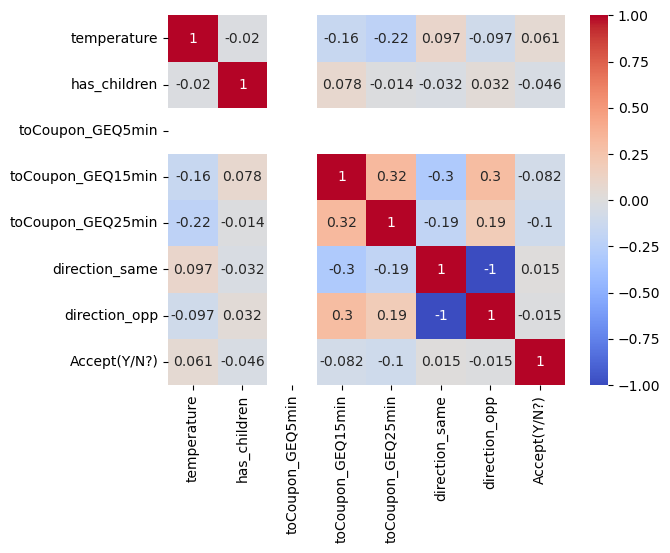

In [109]:
# Correlation of numeric categorical features through heatmap

sns.heatmap(data.corr(), annot=True, cmap='coolwarm')

"""
From the correlation matrix, we can see that Feature ‘direction_same’ is perfectly correlated with ‘direction_opp’, both have the same correlation value with the target feature. so there is no need for two perfectly correlated features so we can remove one of them feature.

‘toCoupon_GEQ5min’ feature does not correlate with the target feature because it has the same value ‘1’ for all data points, which means all the food venues are at least more than five minutes away from the user.

so, need to drop both ‘direction_opp’ and ‘toCoupon_GEQ5min’ features because it has less importance and will not much help in prediction.
"""

In [110]:
# Dropping both ‘direction_opp’ and ‘toCoupon_GEQ5min’ features because it has less importance and will not much help in prediction.

data.drop(columns=['direction_opp'], axis=1, inplace=True)
data.drop(columns=['toCoupon_GEQ5min'], axis=1, inplace=True)

In [111]:
# FE -- to_Coupon is combination of two feature, toCoupon_GEQ15min and toCoupon_GEQ25min

to_Coupon = []
for i in tqdm(range(data.shape[0])):
    if (list(data['toCoupon_GEQ15min'])[i] == 0):
        to_Coupon.append(0)
    elif (list(data['toCoupon_GEQ15min'])[i] == 1)and(list(data['toCoupon_GEQ25min'])[i] == 0):
        to_Coupon.append(1)
    else:
        to_Coupon.append(2)
        
# print(len(to_Coupon)) #12610
data['to_Coupon'] = to_Coupon

100%|██████████| 12684/12684 [00:17<00:00, 712.69it/s]


In [112]:
print("After data cleaning and Feature Engineering,")
print("Number of data points:", data.shape[0])
print("Number of features:", data.shape[1])
print('-'*100)
print("The attributes of data :\n", data.columns.values)

After data cleaning and Feature Engineering,
Number of data points: 12684
Number of features: 23
----------------------------------------------------------------------------------------------------
The attributes of data :
 ['destination' 'passanger' 'weather' 'temperature' 'coupon' 'expiration'
 'gender' 'age' 'maritalStatus' 'has_children' 'education' 'occupation'
 'income' 'Bar' 'CoffeeHouse' 'CarryAway' 'RestaurantLessThan20'
 'Restaurant20To50' 'toCoupon_GEQ15min' 'toCoupon_GEQ25min'
 'direction_same' 'Accept(Y/N?)' 'to_Coupon']


In [113]:
data.rename(columns={'Accept(Y/N?)':'Accept'}, inplace=True)
data.head(2)

,destination,passanger,weather,temperature,coupon,expiration,gender,age,maritalStatus,has_children,education,occupation,income,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,Accept,to_Coupon
0,No Urgent Place,Alone,Sunny,55,Restaurant(<20),1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,never,never,1~3,4~8,1~3,0,0,0,1,0
1,No Urgent Place,Friend(s),Sunny,80,Coffee House,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,never,never,1~3,4~8,1~3,0,0,0,0,0


In [114]:
def univariate_analysis(column_name):
    df_EDA = pd.DataFrame(sorted(list(data[column_name].unique())),columns=[column_name])
    df_EDA['Total_Count'] = list(data.groupby(column_name).Accept.count())
    df_EDA['Accepted'] = list(data[data.Accept==1].groupby(column_name).Accept.count())
    df_EDA['Rejected'] = list(data[data.Accept==0].groupby(column_name).Accept.count())
    df_EDA['%Accepted'] = round(df_EDA['Accepted']/df_EDA['Total_Count']*100,3)
    df_EDA['%Rejected'] = round(df_EDA['Rejected']/df_EDA['Total_Count']*100,3)
    df_EDA = df_EDA.sort_values(by='Total_Count', ascending=False)
    
    fig = plt.subplots(figsize =(8, 4))
    plt.barh(df_EDA[column_name],df_EDA['Total_Count'])
    plt.barh(df_EDA[column_name],df_EDA['Accepted'])
    plt.legend(labels=['Total','Accepted'])
    plt.xlabel('Counts')
    plt.title(column_name+' wise accepted coupons')
    plt.show()

    return df_EDA

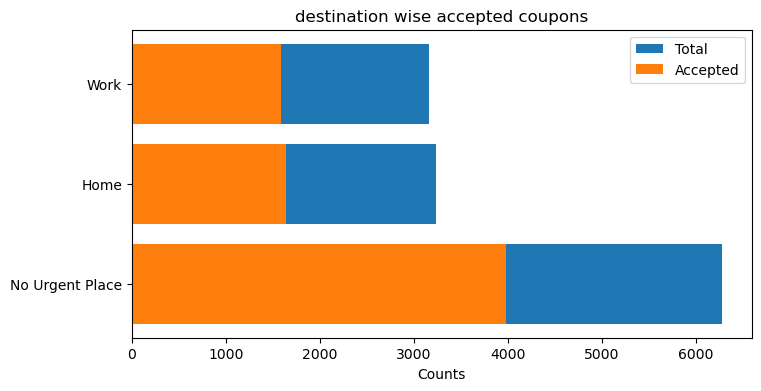

,destination,Total_Count,Accepted,Rejected,%Accepted,%Rejected
1,No Urgent Place,6283,3982,2301,63.377,36.623
0,Home,3237,1639,1598,50.633,49.367
2,Work,3164,1589,1575,50.221,49.779


In [115]:
univariate_analysis('destination')

# We can say from the above plot and calculation.
1.No Urgent place users are almost double than home and work users.
2.Home and work users acceptence are similler.

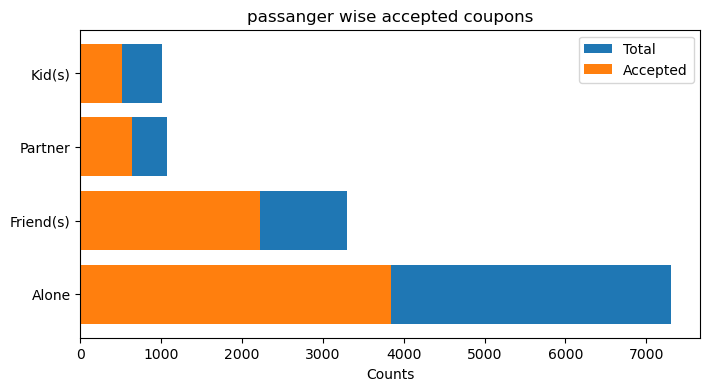

'\nPassanger who is travelling with friend(s) acceptance rate higher then other users. Secondly who is travelling with their partner.\nBut, who is travelling with kid(s) their acceptance is low from others.\n'

In [116]:
univariate_analysis('passanger')

"""
Passanger who is travelling with friend(s) acceptance rate higher then other users. Secondly who is travelling with their partner.
But, who is travelling with kid(s) their acceptance is low from others.
"""

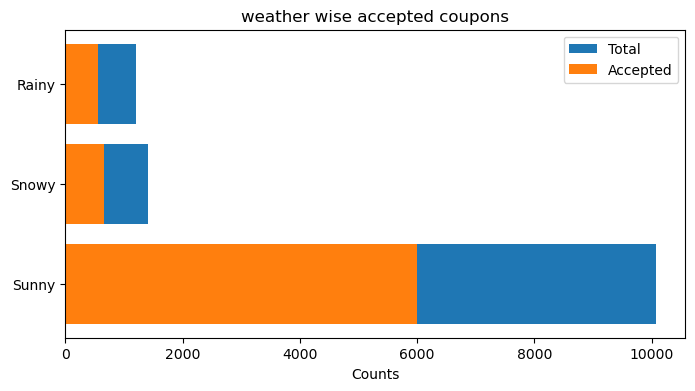

'\nIn Snowy and Rainy weather usres count and acceptance rate is almost same. But, in sunny weather users are more.\n'

In [117]:
univariate_analysis('weather')

"""
In Snowy and Rainy weather usres count and acceptance rate is almost same. But, in sunny weather users are more.
"""

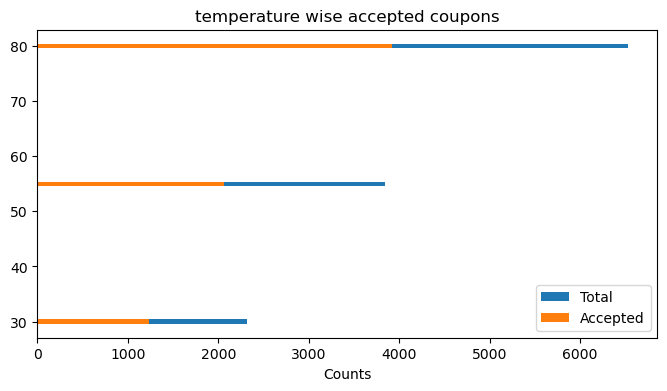

'\nMost of the users prefer to go out when the temparature is 80 F.\nIn 80 F acceptance rate is 60%\n'

In [118]:
univariate_analysis('temperature')

"""
Most of the users prefer to go out when the temparature is 80 F.
In 80 F acceptance rate is 60%
"""

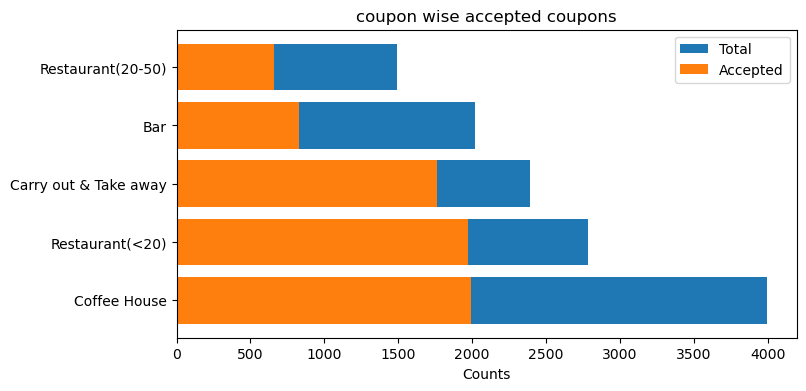

'\nLess coupon is offerd are from Resturant(20-50).\nAcceptance rate of high for Take away which is 70%.\nBar coupon acceptance rate is 41%\n'

In [119]:
univariate_analysis('coupon')

"""
Less coupon is offerd are from Resturant(20-50).
Acceptance rate of high for Take away which is 70%.
Bar coupon acceptance rate is 41%
"""

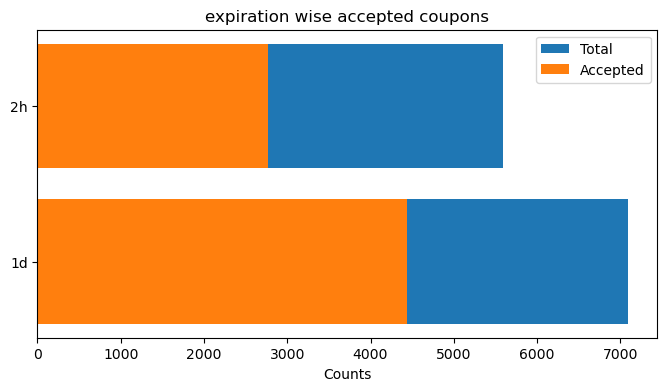

'\nFrom the below analysis we can observe that users are accepting more coupon which expire time is 1 day\n'

In [120]:
univariate_analysis('expiration')

"""
From the below analysis we can observe that users are accepting more coupon which expire time is 1 day
"""

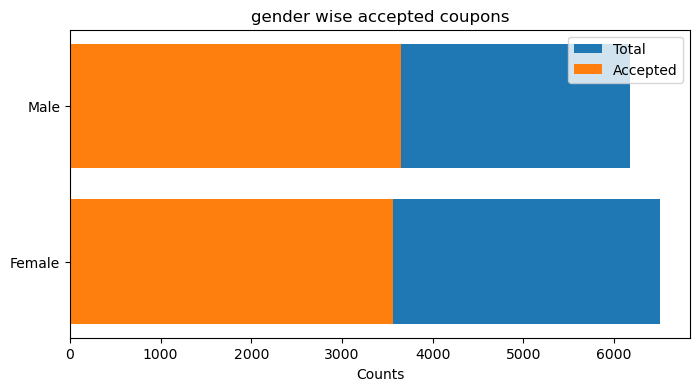

'\nFrom the below observation we can analyze that users male and female both are almost same.\nNot much difference rejection rate also it is almost 5%\n'

In [121]:
univariate_analysis('gender')

"""
From the below observation we can analyze that users male and female both are almost same.
Not much difference rejection rate also it is almost 5%
"""

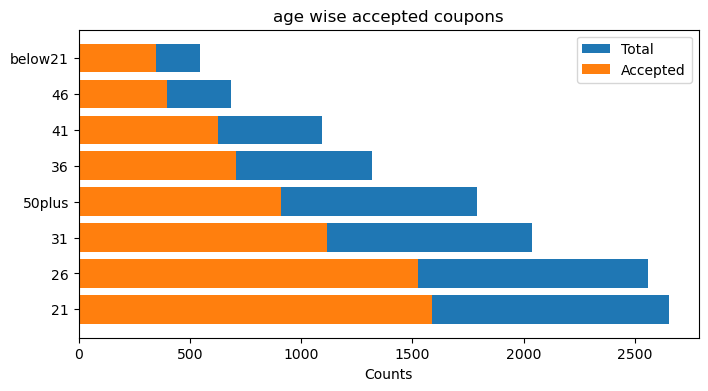

'\nMost users in this data have ages between 21 to 26 years.\nThe users whose age is below 21 years have the highest coupon acceptance ratio.\nThe users whose age is above 50 years have the highest coupon rejection ratio.\n'

In [122]:
univariate_analysis('age')

"""
Most users in this data have ages between 21 to 26 years.
The users whose age is below 21 years have the highest coupon acceptance ratio.
The users whose age is above 50 years have the highest coupon rejection ratio.
"""

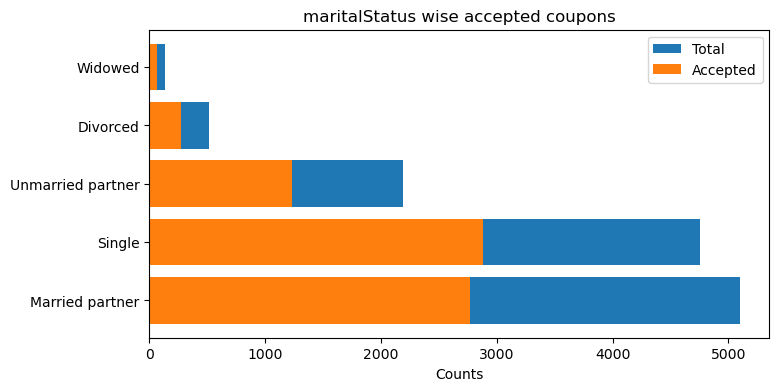

'\nMost users in this data have Married and Single. There are not much difference\nThe users who is single have the highest coupon acceptance ratio.\nThe users who is widowed have the highest coupon rejection ratio.\n'

In [123]:
univariate_analysis('maritalStatus')

"""
Most users in this data have Married and Single. There are not much difference
The users who is single have the highest coupon acceptance ratio.
The users who is widowed have the highest coupon rejection ratio.
"""

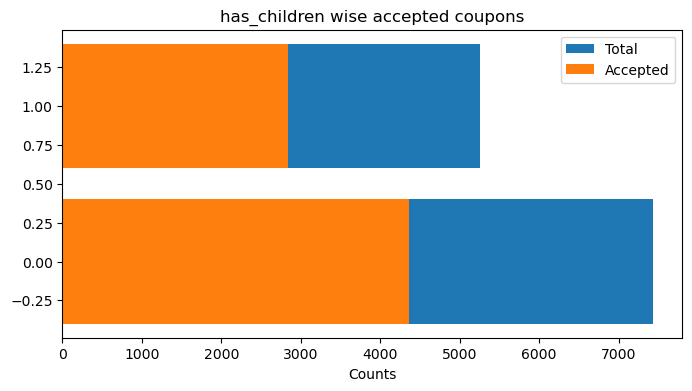

'\nUsers who has no children is high and acceptance rate is also slightly high then the users who have children\n'

In [124]:
univariate_analysis('has_children')

"""
Users who has no children is high and acceptance rate is also slightly high then the users who have children
"""

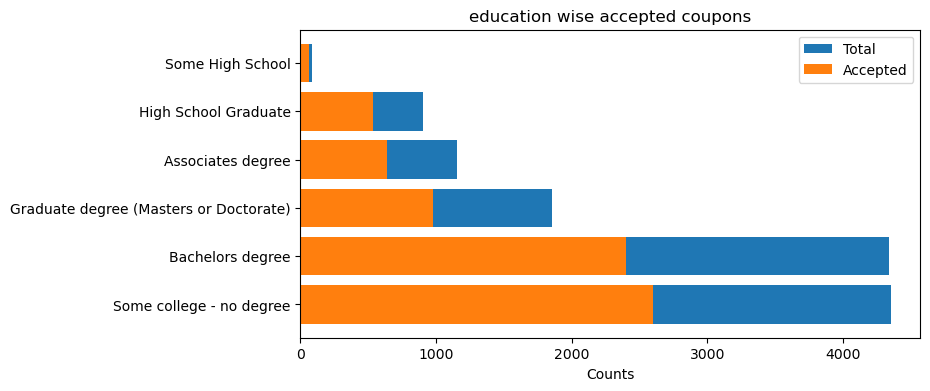

'\nSome college - no degree and Bachelors degree users are almost same.\nAcceptance rate is slightly high for some college-no degree then Bacelors degree.\nHighest acceptance rate is highest for Some high school users.\nHighest rejection rate is for Graduate degree(Masters or Doctorate) users\n'

In [125]:
univariate_analysis('education')

"""
Some college - no degree and Bachelors degree users are almost same.
Acceptance rate is slightly high for some college-no degree then Bacelors degree.
Highest acceptance rate is highest for Some high school users.
Highest rejection rate is for Graduate degree(Masters or Doctorate) users
"""

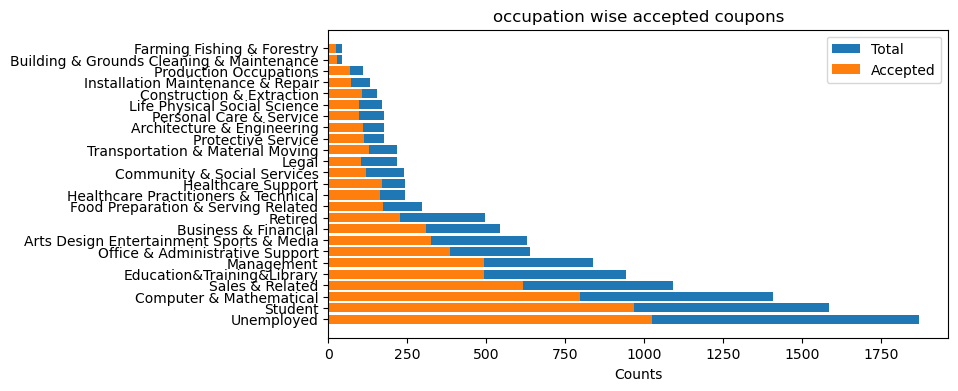

'\nMost users in this data are Unemployed and Student.\nUsers who are students have more coupon acceptance ratio than Unemployed users.\nUsers who have occupation Healthcare Support and Construction & Extraction accept more coupons than others.\n'

In [126]:
univariate_analysis('occupation')

"""
Most users in this data are Unemployed and Student.
Users who are students have more coupon acceptance ratio than Unemployed users.
Users who have occupation Healthcare Support and Construction & Extraction accept more coupons than others.
"""

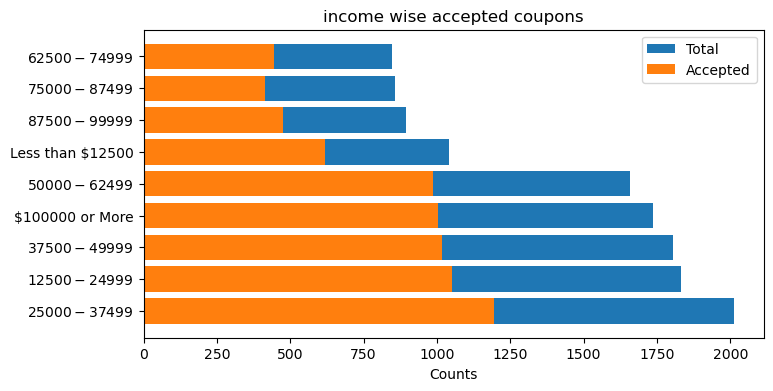

'\nMost users in this data have income is 25000 to 37499.\nAcceptance rate is same for 25000-37499, 50000-62499 and Less than 12500 users.\nUsers who have medium-range income are mostly rejecting the coupon.\n'

In [127]:
univariate_analysis('income')

"""
Most users in this data have income is 25000 to 37499.
Acceptance rate is same for 25000-37499, 50000-62499 and Less than 12500 users.
Users who have medium-range income are mostly rejecting the coupon.
"""

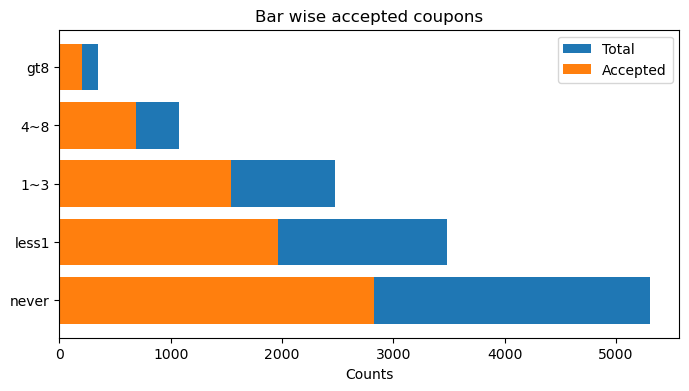

'\nMost of the users are the data never visited to Bar.\nHigh acceptance users are visited Bar 1-3 and 4-8 times.\nUsers are less visited Bar Greater than 8 times\n'

In [128]:
univariate_analysis('Bar')

"""
Most of the users are the data never visited to Bar.
High acceptance users are visited Bar 1-3 and 4-8 times.
Users are less visited Bar Greater than 8 times
"""

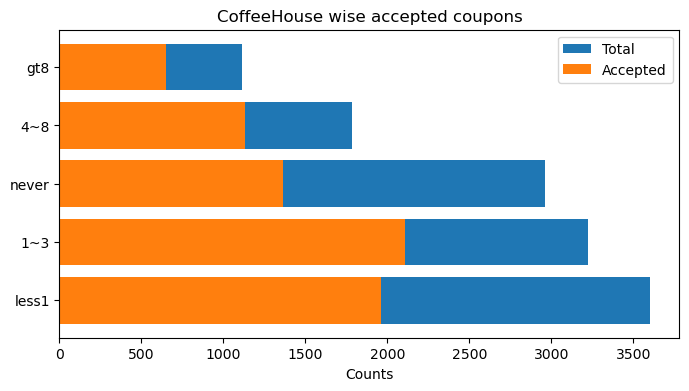

'\nHigh acceptance users are who visited 1-3 and 4-8 times.\nUsres are high who visited less than 1 time to Coffee House.\nUsesr who never visited to coffee house rejection rate is also high.\n'

In [129]:
univariate_analysis('CoffeeHouse')

"""
High acceptance users are who visited 1-3 and 4-8 times.
Usres are high who visited less than 1 time to Coffee House.
Usesr who never visited to coffee house rejection rate is also high.
"""

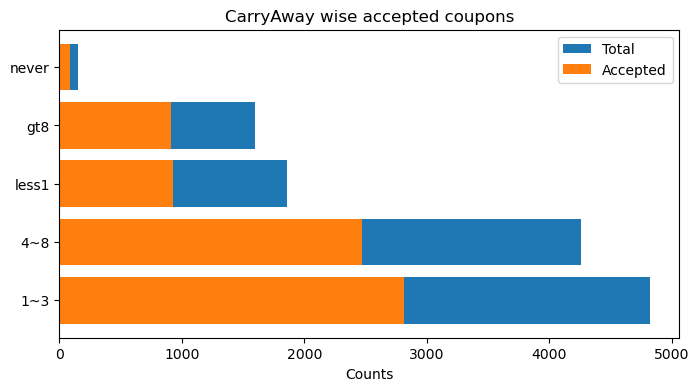

'\nMost users in this data have visited 1 to 8 times Carry Away services.\nUsers who visited Carry Away services greater than 1 time have the highest coupon acceptance ratio is approx 58%.\n'

In [130]:
univariate_analysis('CarryAway')

"""
Most users in this data have visited 1 to 8 times Carry Away services.
Users who visited Carry Away services greater than 1 time have the highest coupon acceptance ratio is approx 58%.
"""

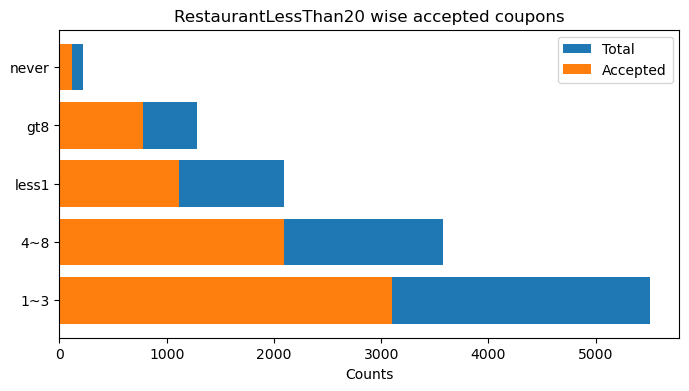

,RestaurantLessThan20,Total_Count,Accepted,Rejected,%Accepted,%Rejected
0,1~3,5506,3099,2407,56.284,43.716
1,4~8,3580,2093,1487,58.464,41.536
3,less1,2093,1119,974,53.464,46.536
2,gt8,1285,781,504,60.778,39.222
4,never,220,118,102,53.636,46.364


In [131]:
univariate_analysis('RestaurantLessThan20')

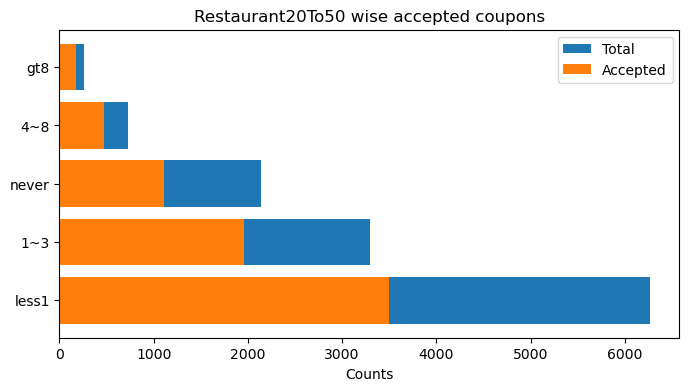

,Restaurant20To50,Total_Count,Accepted,Rejected,%Accepted,%Rejected
3,less1,6266,3495,2771,55.777,44.223
0,1~3,3290,1958,1332,59.514,40.486
4,never,2136,1105,1031,51.732,48.268
1,4~8,728,477,251,65.522,34.478
2,gt8,264,175,89,66.288,33.712


In [132]:
univariate_analysis('Restaurant20To50')

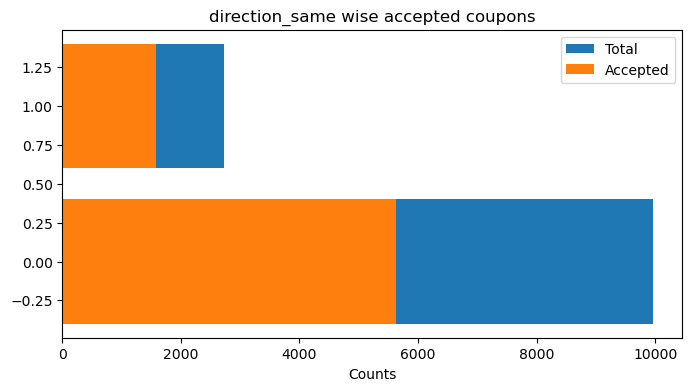

'\nSame and Opposite both direction coupons have almost similar acceptance ratios.\n'

In [133]:
univariate_analysis('direction_same')

"""
Same and Opposite both direction coupons have almost similar acceptance ratios.
"""

In [134]:
def bivariate_analysis(col1,col2,c1,c2,no_row):
    a = list(data[col1].unique())
    b = list(data[col2].unique())
    df = pd.DataFrame([(i, j) for i in a for j in b], columns=[col1,col2])
    Total_Count=[]; Accepted=[]; Rejected=[]
    for i in range(df.shape[0]):
        Total_Count.append((data[(c1==df[col1][i]) & (c2==df[col2][i])]).shape[0])
        Accepted.append((data[(c1==df[col1][i]) & (c2==df[col2][i]) & (data.Accept==1)]).shape[0])
        Rejected.append((data[(c1==df[col1][i]) & (c2==df[col2][i]) & (data.Accept==0)]).shape[0])
    df['Total_Count'] = Total_Count
    df['Accepted'] = Accepted
    df['Rejected'] = Rejected
    df['%Accepted'] = round(df['Accepted']/df['Total_Count']*100,3)
    df['%Rejected'] = round(df['Rejected']/df['Total_Count']*100,3)
    df = df.dropna()
    df = df.sort_values(by='%Accepted', ascending=False)
    d = pd.concat([df.head(no_row), df.tail(no_row)], axis=0)
    return d

Text(0.5, 1.0, 'destination vs weather (count)')

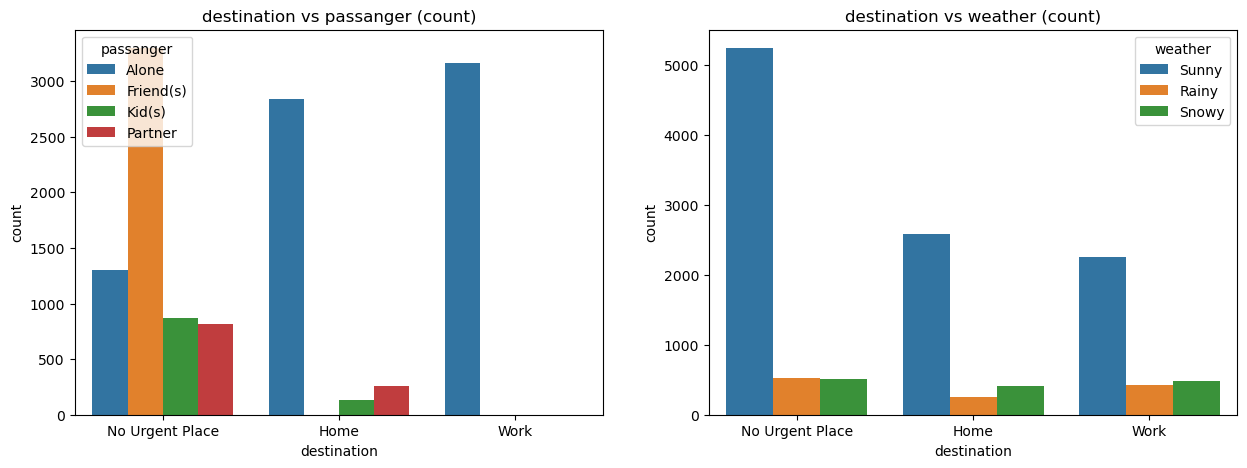

In [135]:
# Which weather do users go to Work, Home, or No Urgent Place, and with whom?

fig,axes = plt.subplots(1, 2, figsize=(15, 5))
sns.countplot(data['destination'],hue=data['passanger'],ax=axes[0])
sns.countplot(data['destination'],hue=data['weather'],ax=axes[1])
axes[0].set_title('destination vs passanger (count)'); axes[1].set_title('destination vs weather (count)')

In [136]:
bivariate_analysis('destination','weather',data.destination,data.weather,3)

,destination,weather,Total_Count,Accepted,Rejected,%Accepted,%Rejected
0,No Urgent Place,Sunny,5242,3396,1846,64.784,35.216
2,No Urgent Place,Snowy,510,305,205,59.804,40.196
3,Home,Sunny,2577,1407,1170,54.598,45.402
4,Home,Rainy,254,111,143,43.701,56.299
7,Work,Rainy,425,168,257,39.529,60.471
5,Home,Snowy,406,121,285,29.803,70.197


In [137]:
bivariate_analysis('passanger','weather',data.passanger,data.weather,3)

,passanger,weather,Total_Count,Accepted,Rejected,%Accepted,%Rejected
5,Friend(s),Snowy,259,196,63,75.676,24.324
3,Friend(s),Sunny,2894,1954,940,67.519,32.481
9,Partner,Sunny,855,517,338,60.468,39.532
1,Alone,Rainy,831,360,471,43.321,56.679
2,Alone,Snowy,1016,414,602,40.748,59.252
8,Kid(s),Snowy,66,15,51,22.727,77.273


Text(0.5, 1.0, 'coupon vs temperature (count)')

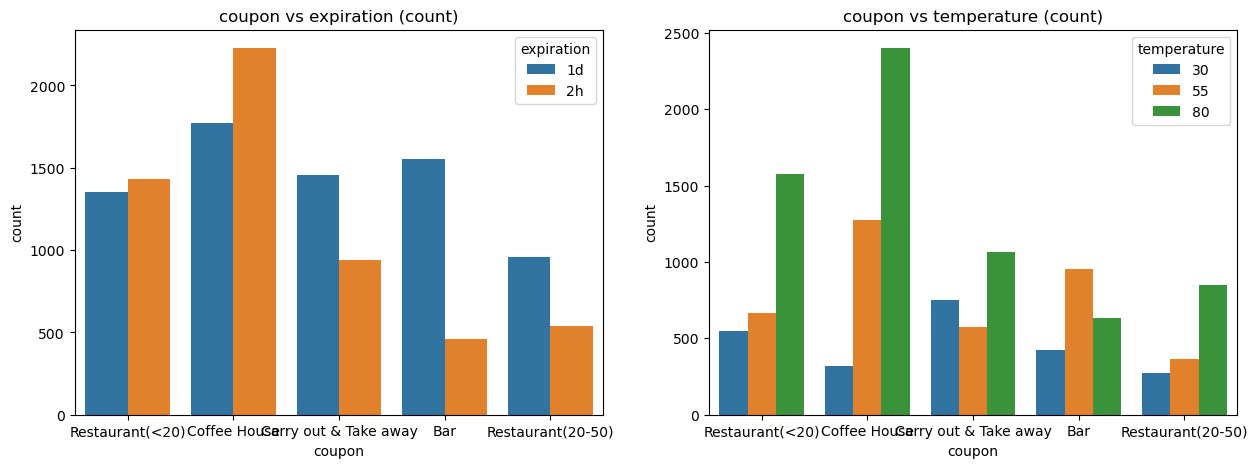

In [138]:
# How 

fig,axes = plt.subplots(1, 2, figsize=(15, 5))
sns.countplot(data['coupon'],hue=data['expiration'],ax=axes[0])
sns.countplot(data['coupon'],hue=data['temperature'],ax=axes[1])
axes[0].set_title('coupon vs expiration (count)'); axes[1].set_title('coupon vs temperature (count)')

In [139]:
bivariate_analysis('coupon','expiration',data.coupon,data.expiration,3)

,coupon,expiration,Total_Count,Accepted,Rejected,%Accepted,%Rejected
0,Restaurant(<20),1d,1354,1126,228,83.161,16.839
4,Carry out & Take away,1d,1456,1138,318,78.159,21.841
5,Carry out & Take away,2h,937,622,315,66.382,33.618
6,Bar,1d,1556,641,915,41.195,58.805
7,Bar,2h,461,186,275,40.347,59.653
9,Restaurant(20-50),2h,536,160,376,29.851,70.149


In [140]:
bivariate_analysis('coupon','temperature',data.coupon,data.temperature,3)

,coupon,temperature,Total_Count,Accepted,Rejected,%Accepted,%Rejected
1,Restaurant(<20),80,1575,1198,377,76.063,23.937
8,Carry out & Take away,30,751,568,183,75.632,24.368
7,Carry out & Take away,80,1066,778,288,72.983,27.017
10,Bar,80,635,261,374,41.102,58.898
14,Restaurant(20-50),30,273,92,181,33.700,66.300
11,Bar,30,426,139,287,32.629,67.371


Text(0.5, 1.0, 'age vs passanger (count)')

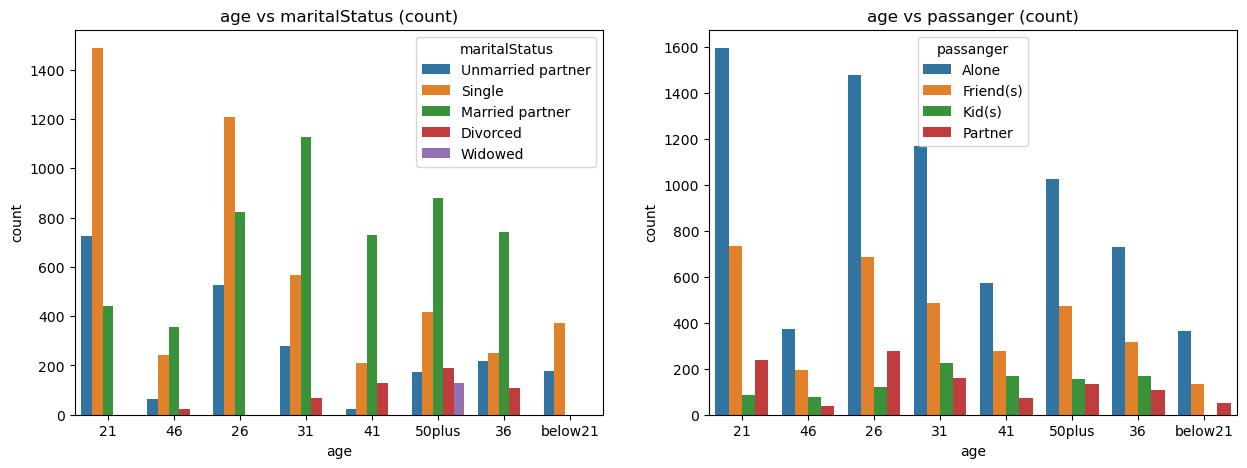

In [141]:
# Analysis of passanger, maritalStatus and has_children features

fig,axes = plt.subplots(1, 2, figsize=(15, 5))
sns.countplot(data['age'],hue=data['maritalStatus'],ax=axes[0])
sns.countplot(data['age'],hue=data['passanger'],ax=axes[1])
axes[0].set_title('age vs maritalStatus (count)'); axes[1].set_title('age vs passanger (count)')

Observations:
below21, 21, 26 age users most of single or have an unmarried partner.
31, 36, 41, 46, 50plus age users most of have Married partner.
All Widowed users have 50plus age.
Maximum Divorced users have 50plus age.
All Divorced users have an age above 31.
below21 age users never travel with kid.
Most Single, Married and Unmarried Users go out Alone or with Friends.

'\nFor Bar coupons, 21 and 26 age users accept the coupon more than others.\nMostly every age users accept Carry out & Take away and Restaurant(<20) coupons.\nbelow21 age users have more acceptence for Coffee House coupons approx 70%.\nOlder age users have least acceptance for Bar Coupons.\n'

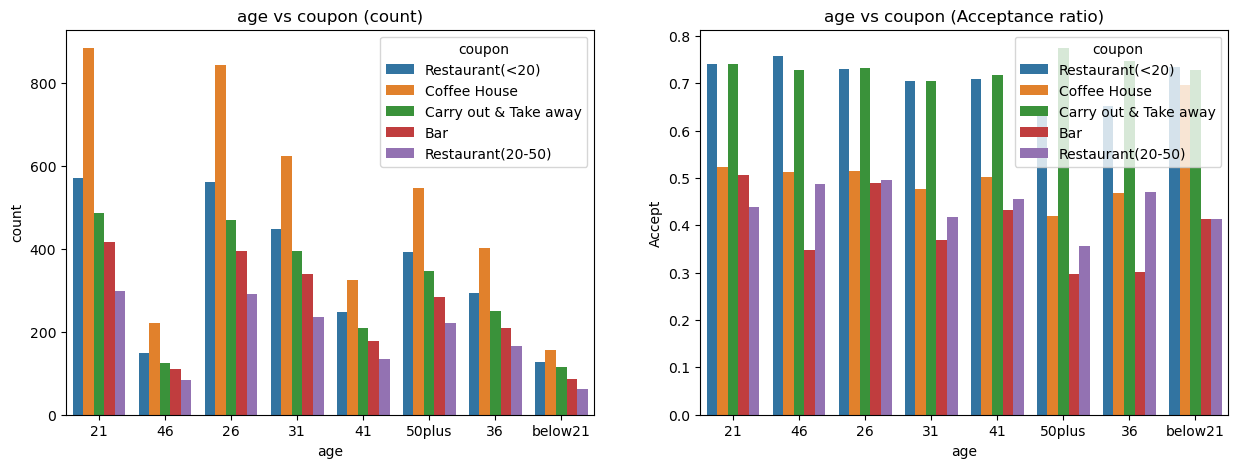

In [142]:
# Which age group accept more coupon?

fig,axes = plt.subplots(1, 2, figsize=(15, 5))
sns.countplot(data['age'],hue=data['coupon'],ax=axes[0])
sns.barplot(ax=axes[1], x="age", y="Accept", hue='coupon', ci=None, data=data)
axes[0].set_title('age vs coupon (count)'); axes[1].set_title('age vs coupon (Acceptance ratio)')

"""
For Bar coupons, 21 and 26 age users accept the coupon more than others.
Mostly every age users accept Carry out & Take away and Restaurant(<20) coupons.
below21 age users have more acceptence for Coffee House coupons approx 70%.
Older age users have least acceptance for Bar Coupons.
"""

'\nAcceptance of Carry out & Take away coupons do not depend on the CarryAway feature.\nUsers who have never been to Carry out & Take away have 2nd highest acceptance ratio for Carry out coupons.\nEvery users have the good acceptance ratio for Carry out & Take away coupons\n'

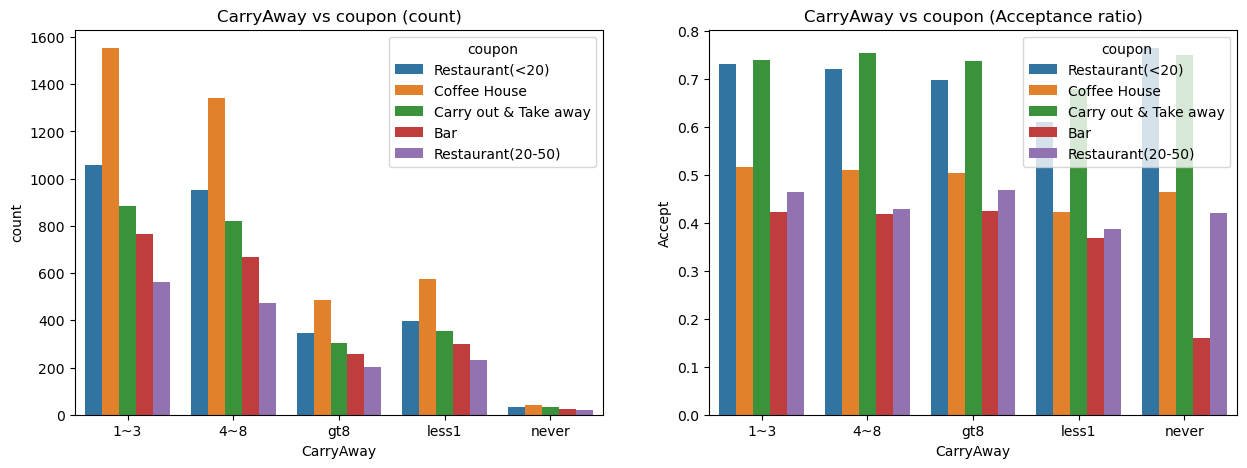

In [143]:
fig,axes = plt.subplots(1, 2, figsize=(15, 5))
sns.countplot(data['CarryAway'],hue=data['coupon'],ax=axes[0])
sns.barplot(ax=axes[1], x="CarryAway", y="Accept", hue='coupon', ci=None, data=data)
axes[0].set_title('CarryAway vs coupon (count)'); axes[1].set_title('CarryAway vs coupon (Acceptance ratio)')
df = bivariate_analysis('CarryAway','coupon',data.CarryAway,data.coupon,13)
df[df.coupon == 'Carry out & Take away']

"""
Acceptance of Carry out & Take away coupons do not depend on the CarryAway feature.
Users who have never been to Carry out & Take away have 2nd highest acceptance ratio for Carry out coupons.
Every users have the good acceptance ratio for Carry out & Take away coupons
"""

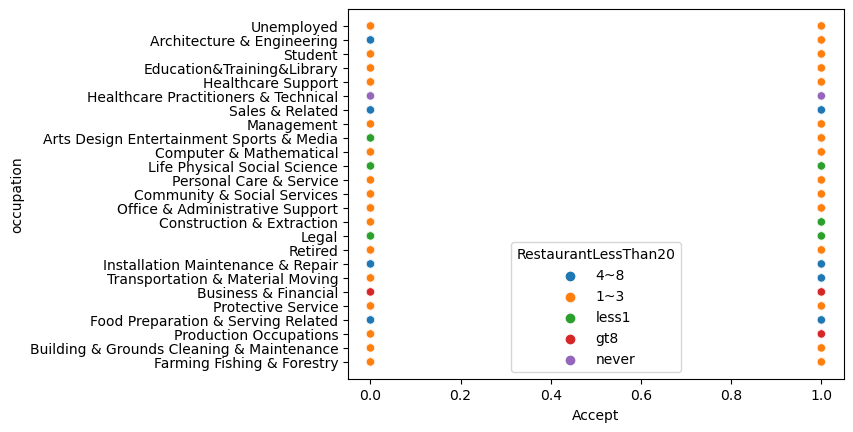

'We can say that there is no relation between Accept and Occupation columns.'

In [144]:
sns.scatterplot(x='Accept', y='occupation', hue='RestaurantLessThan20', data=data)
plt.show()

"""We can say that there is no relation between Accept and Occupation columns."""

'\n0: direction_same, 1: direction_opposite\nVery few opposite-direction coupons are offered to users.\nSame and Opposite direction coupons have almost similar acceptance ratios for every coupon type.\n'

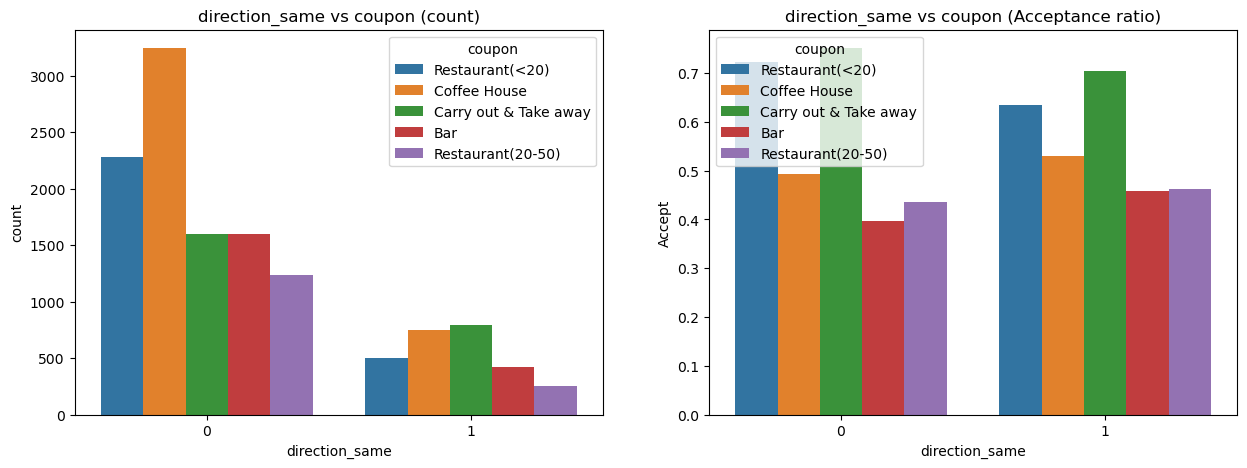

In [145]:
# Bivariate Analysis of direction_same and coupon type

fig,axes = plt.subplots(1, 2, figsize=(15, 5))
sns.countplot(data['direction_same'],hue=data['coupon'],ax=axes[0])
sns.barplot(ax=axes[1], x="direction_same", y="Accept", hue='coupon', ci=None, data=data)
axes[0].set_title('direction_same vs coupon (count)'); axes[1].set_title('direction_same vs coupon (Acceptance ratio)')

"""
0: direction_same, 1: direction_opposite
Very few opposite-direction coupons are offered to users.
Same and Opposite direction coupons have almost similar acceptance ratios for every coupon type.
"""

'\nUsers who have already been in expensive Restaurant grater than 8 times have the highest acceptance ratio for Restaurant(20-50) coupons.\nUsers who have never been to expensive Restaurant have the least acceptance ratio for Restaurant(20-50) coupons.\nAcceptance of Restaurant(20-50) coupons depends on the Restaurant20To50 feature.\n'

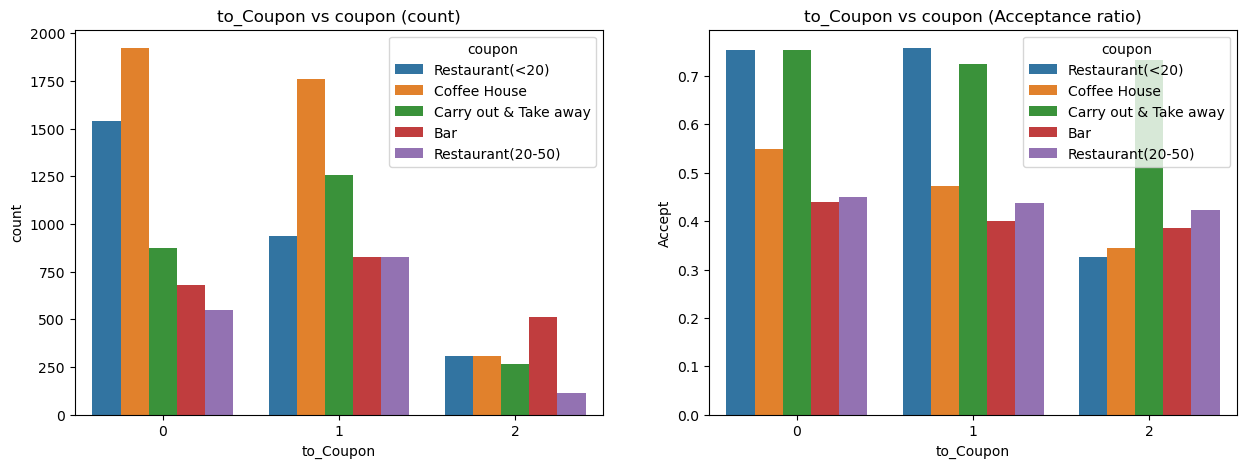

In [146]:
# Bivariate Analysis of to_Coupon and coupon type

fig,axes = plt.subplots(1, 2, figsize=(15, 5))
sns.countplot(data['to_Coupon'],hue=data['coupon'],ax=axes[0])
sns.barplot(ax=axes[1], x="to_Coupon", y="Accept", hue='coupon', ci=None, data=data)
axes[0].set_title('to_Coupon vs coupon (count)'); axes[1].set_title('to_Coupon vs coupon (Acceptance ratio)')
bivariate_analysis('to_Coupon','coupon',data.to_Coupon,data.coupon,4)

"""
Users who have already been in expensive Restaurant grater than 8 times have the highest acceptance ratio for Restaurant(20-50) coupons.
Users who have never been to expensive Restaurant have the least acceptance ratio for Restaurant(20-50) coupons.
Acceptance of Restaurant(20-50) coupons depends on the Restaurant20To50 feature.
"""

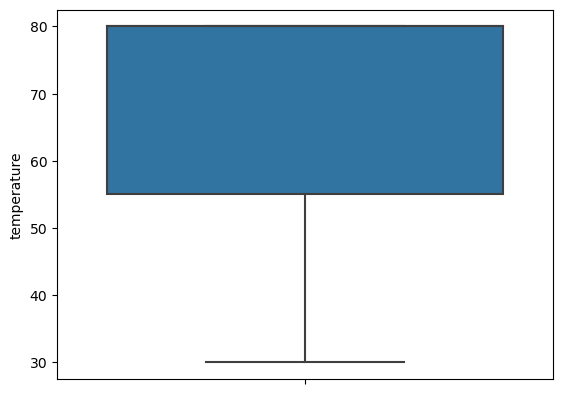

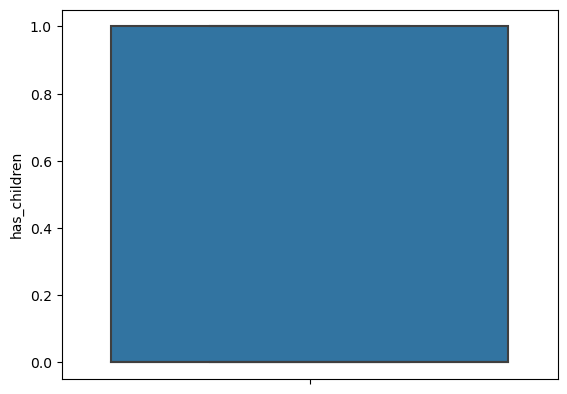

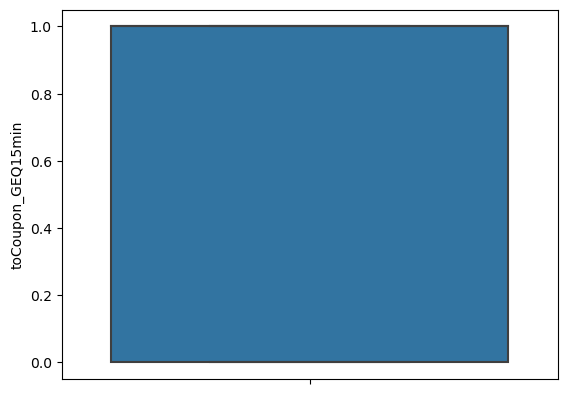

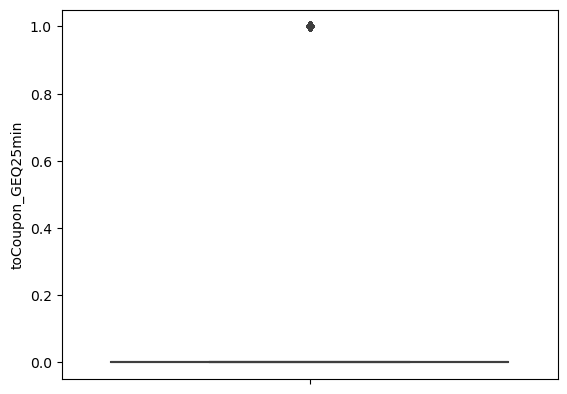

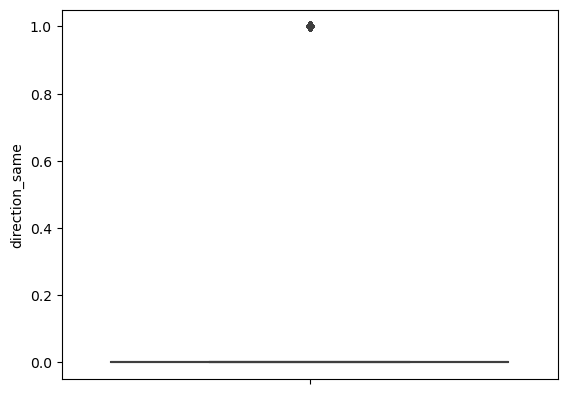

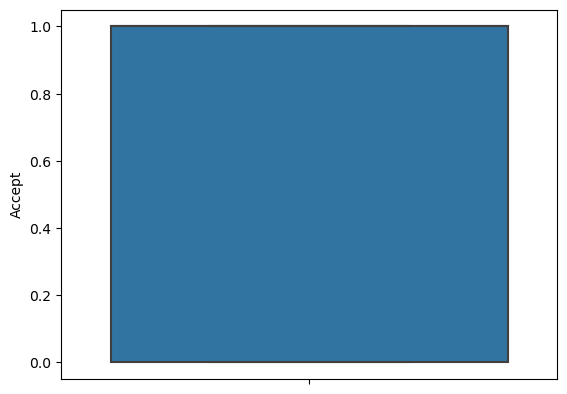

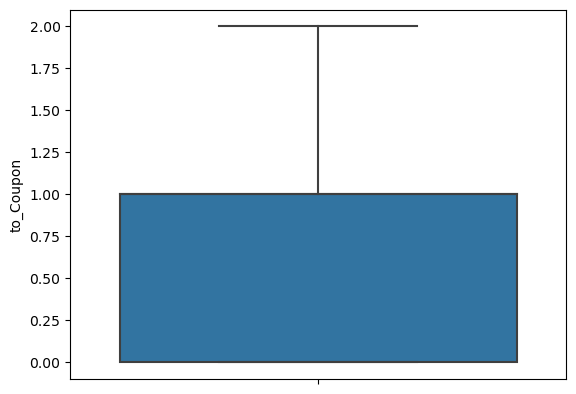

In [147]:
# Creating boxplot for all numerical columns checking for outlier

def boxplot(cols):
    sns.boxplot(y=data[cols])
    plt.show()
    
for i in list(data.select_dtypes(exclude=['object']).columns):
    boxplot(i)

<AxesSubplot:>

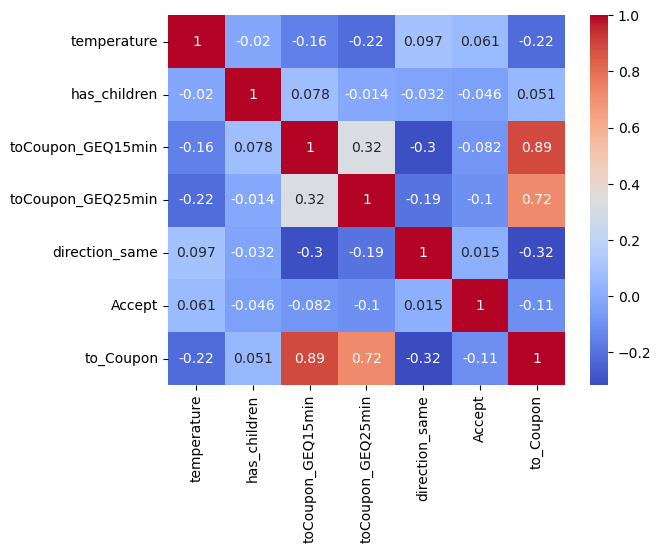

In [148]:
# Checking corelation of each columns

sns.heatmap(data.corr(), annot=True, cmap='coolwarm')

# Data Preprocessing

In [149]:
data.select_dtypes(include=['object']).columns

Index(['destination', 'passanger', 'weather', 'coupon', 'expiration', 'gender',
       'age', 'maritalStatus', 'education', 'occupation', 'income', 'Bar',
       'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50'],
      dtype='object')

In [150]:
# Making a copy of old dataset
df=data.copy()

In [151]:
df.head(2)

,destination,passanger,weather,temperature,coupon,expiration,gender,age,maritalStatus,has_children,education,occupation,income,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,Accept,to_Coupon
0,No Urgent Place,Alone,Sunny,55,Restaurant(<20),1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,never,never,1~3,4~8,1~3,0,0,0,1,0
1,No Urgent Place,Friend(s),Sunny,80,Coffee House,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,never,never,1~3,4~8,1~3,0,0,0,0,0


In [152]:
# initializing all object columns on cols variable

cols=[i for i in df.columns if df[i].dtype==object]

cols

['destination',
 'passanger',
 'weather',
 'coupon',
 'expiration',
 'gender',
 'age',
 'maritalStatus',
 'education',
 'occupation',
 'income',
 'Bar',
 'CoffeeHouse',
 'CarryAway',
 'RestaurantLessThan20',
 'Restaurant20To50']

In [153]:
df=pd.get_dummies(df, columns=cols, drop_first=True)
df.head()

,temperature,has_children,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,Accept,to_Coupon,destination_No Urgent Place,destination_Work,passanger_Friend(s),passanger_Kid(s),passanger_Partner,...,CarryAway_4~8,CarryAway_gt8,CarryAway_less1,CarryAway_never,RestaurantLessThan20_4~8,RestaurantLessThan20_gt8,RestaurantLessThan20_less1,RestaurantLessThan20_never,Restaurant20To50_4~8,Restaurant20To50_gt8,Restaurant20To50_less1,Restaurant20To50_never
0,55,1,0,0,0,1,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0
1,80,1,0,0,0,0,0,1,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0
2,80,1,1,0,0,1,1,1,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0
3,80,1,1,0,0,0,1,1,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0
4,80,1,1,0,0,0,1,1,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0


In [154]:
# Assinging all the columns except target column to the x variable.
# Assining only target column on the y variable.
# for train test split.

x=df.drop(['Accept'], axis=1).values
y=df['Accept'].values

In [155]:
x_train, x_test, y_train, y_test=train_test_split(x,y, test_size=0.2, random_state=17)

In [156]:
from sklearn.preprocessing import StandardScaler

ss=StandardScaler()
x_train=ss.fit_transform(x_train)
x_test=ss.transform(x_test)

In [157]:
"""param_data={'max_depth':[2,5,8,10,15,20,25],
           'min_samples_split':[5,10,15,20,25],
           'min_samples_leaf':[20,30,40,50],
           'criterion':['gini', 'entropy', 'log_loss'],
           'max_features': ['auot', 'sqrt', 'log2']}
cv_dt=DecisionTreeClassifier()
grid=GridSearchCV(cv_dt, param_grid=param_data, cv=17)
grid.fit(x_test, y_test)
grid.best_params_"""

"param_data={'max_depth':[2,5,8,10,15,20,25],\n           'min_samples_split':[5,10,15,20,25],\n           'min_samples_leaf':[20,30,40,50],\n           'criterion':['gini', 'entropy', 'log_loss'],\n           'max_features': ['auot', 'sqrt', 'log2']}\ncv_dt=DecisionTreeClassifier()\ngrid=GridSearchCV(cv_dt, param_grid=param_data, cv=17)\ngrid.fit(x_test, y_test)\ngrid.best_params_"

In [158]:
# Creating model using Decission tree

dt_model= DecisionTreeClassifier(criterion='gini', max_depth=8,
                                max_features='sqrt', min_samples_leaf=20,
                                min_samples_split=15)
dt_model.fit(x_train, y_train)
dt_model_train_score=dt_model.score(x_train, y_train)
print('Training Score is: ', dt_model_train_score)
dt_model_test_score=dt_model.score(x_test, y_test)
print('Testing score is: ', dt_model_test_score)

Training Score is:  0.6530008869616636
Testing score is:  0.6212061489948758


In [159]:
y_pred=dt_model.predict(x_test)
print('Accuracy Score: ', round(accuracy_score(y_test, y_pred)*100, 2), "%")

Accuracy Score:  62.12 %


In [160]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

print('F-1 Score: ', (f1_score(y_test, y_pred, average='micro')))
print('Precision Score: ', (f1_score(y_test, y_pred, average='micro')))
print('Recall Score: ', (f1_score(y_test, y_pred, average='micro')))

F-1 Score:  0.6212061489948758
Precision Score:  0.6212061489948758
Recall Score:  0.6212061489948758


In [161]:
import itertools
def plot_confusion_matrix(model, normalize=False): # This function prints and plots the confusion matrix.
    cm = confusion_matrix(y_test, model, labels=[0, 1])
    classes=[" Not Accepted", "Accepted"]
    cmap = plt.cm.Blues
    title = "Confusion Matrix"
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        cm = np.around(cm, decimals=3)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

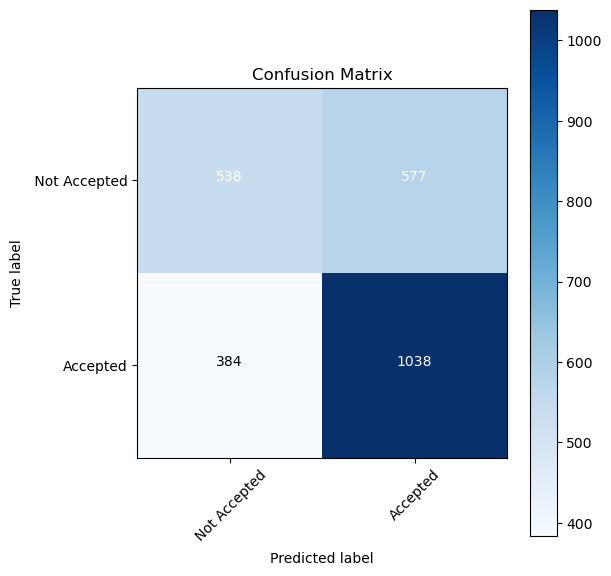

In [162]:
plt.figure(figsize=(6,6))
plot_confusion_matrix(y_pred, normalize=False)
plt.show()

In [163]:
y_pred_prob_dt=dt_model.predict_proba(x_test)[:, 1]
y_pred_dt=dt_model.predict(x_test)

In [164]:
# Model Accuracy
print ('Model Accuracy is: ', (dt_model.score(x_test, y_test))*100)

#Recall Accuracy
print('Model recall is: ', (recall_score(y_test, y_pred_dt))*100)

Model Accuracy is:  62.12061489948758
Model recall is:  72.9957805907173


In [165]:
# Area under Curve

fpr_dt, tpr_dt, _ = roc_curve(y_test, y_pred_prob_dt)
roc_auc_dt=auc(fpr_dt, tpr_dt)

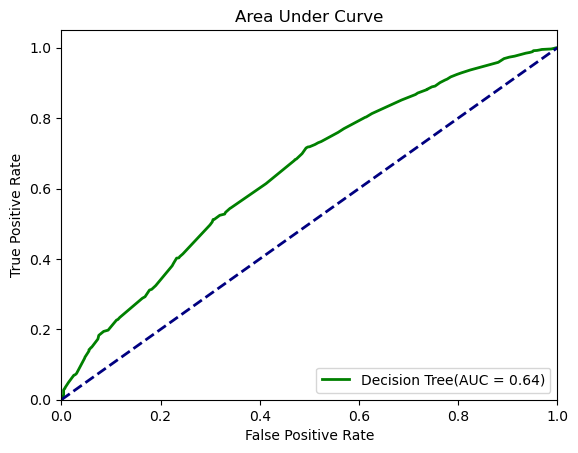

In [166]:
plt.figure(1)
lw = 2
plt.plot(fpr_dt, tpr_dt, color='green',
         lw=lw, label='Decision Tree(AUC = %0.2f)' % roc_auc_dt)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Area Under Curve')
plt.legend(loc="lower right")
plt.show()

Feature ranking:
1. feature 13 (0.080868)
2. feature 17 (0.080680)
3. feature 3 (0.076044)
4. feature 16 (0.068066)
5. feature 8 (0.067069)
6. feature 14 (0.058943)
7. feature 6 (0.057997)
8. feature 74 (0.057631)
9. feature 71 (0.043556)
10. feature 5 (0.039268)
11. feature 2 (0.038547)
12. feature 70 (0.034643)
13. feature 27 (0.032851)
14. feature 0 (0.027437)
15. feature 11 (0.025891)
16. feature 55 (0.023940)
17. feature 31 (0.016633)
18. feature 12 (0.015861)
19. feature 72 (0.012582)
20. feature 7 (0.012516)
21. feature 24 (0.010675)
22. feature 86 (0.010340)
23. feature 56 (0.008604)
24. feature 34 (0.007846)
25. feature 26 (0.007624)
26. feature 25 (0.007503)
27. feature 9 (0.007013)
28. feature 15 (0.006687)
29. feature 60 (0.006240)
30. feature 43 (0.006081)
31. feature 61 (0.006025)
32. feature 75 (0.005750)
33. feature 4 (0.005450)
34. feature 85 (0.005024)
35. feature 20 (0.004573)
36. feature 39 (0.004493)
37. feature 18 (0.003771)
38. feature 1 (0.003221)
39. feature 68

Text(0.5, 0, 'index of the feature')

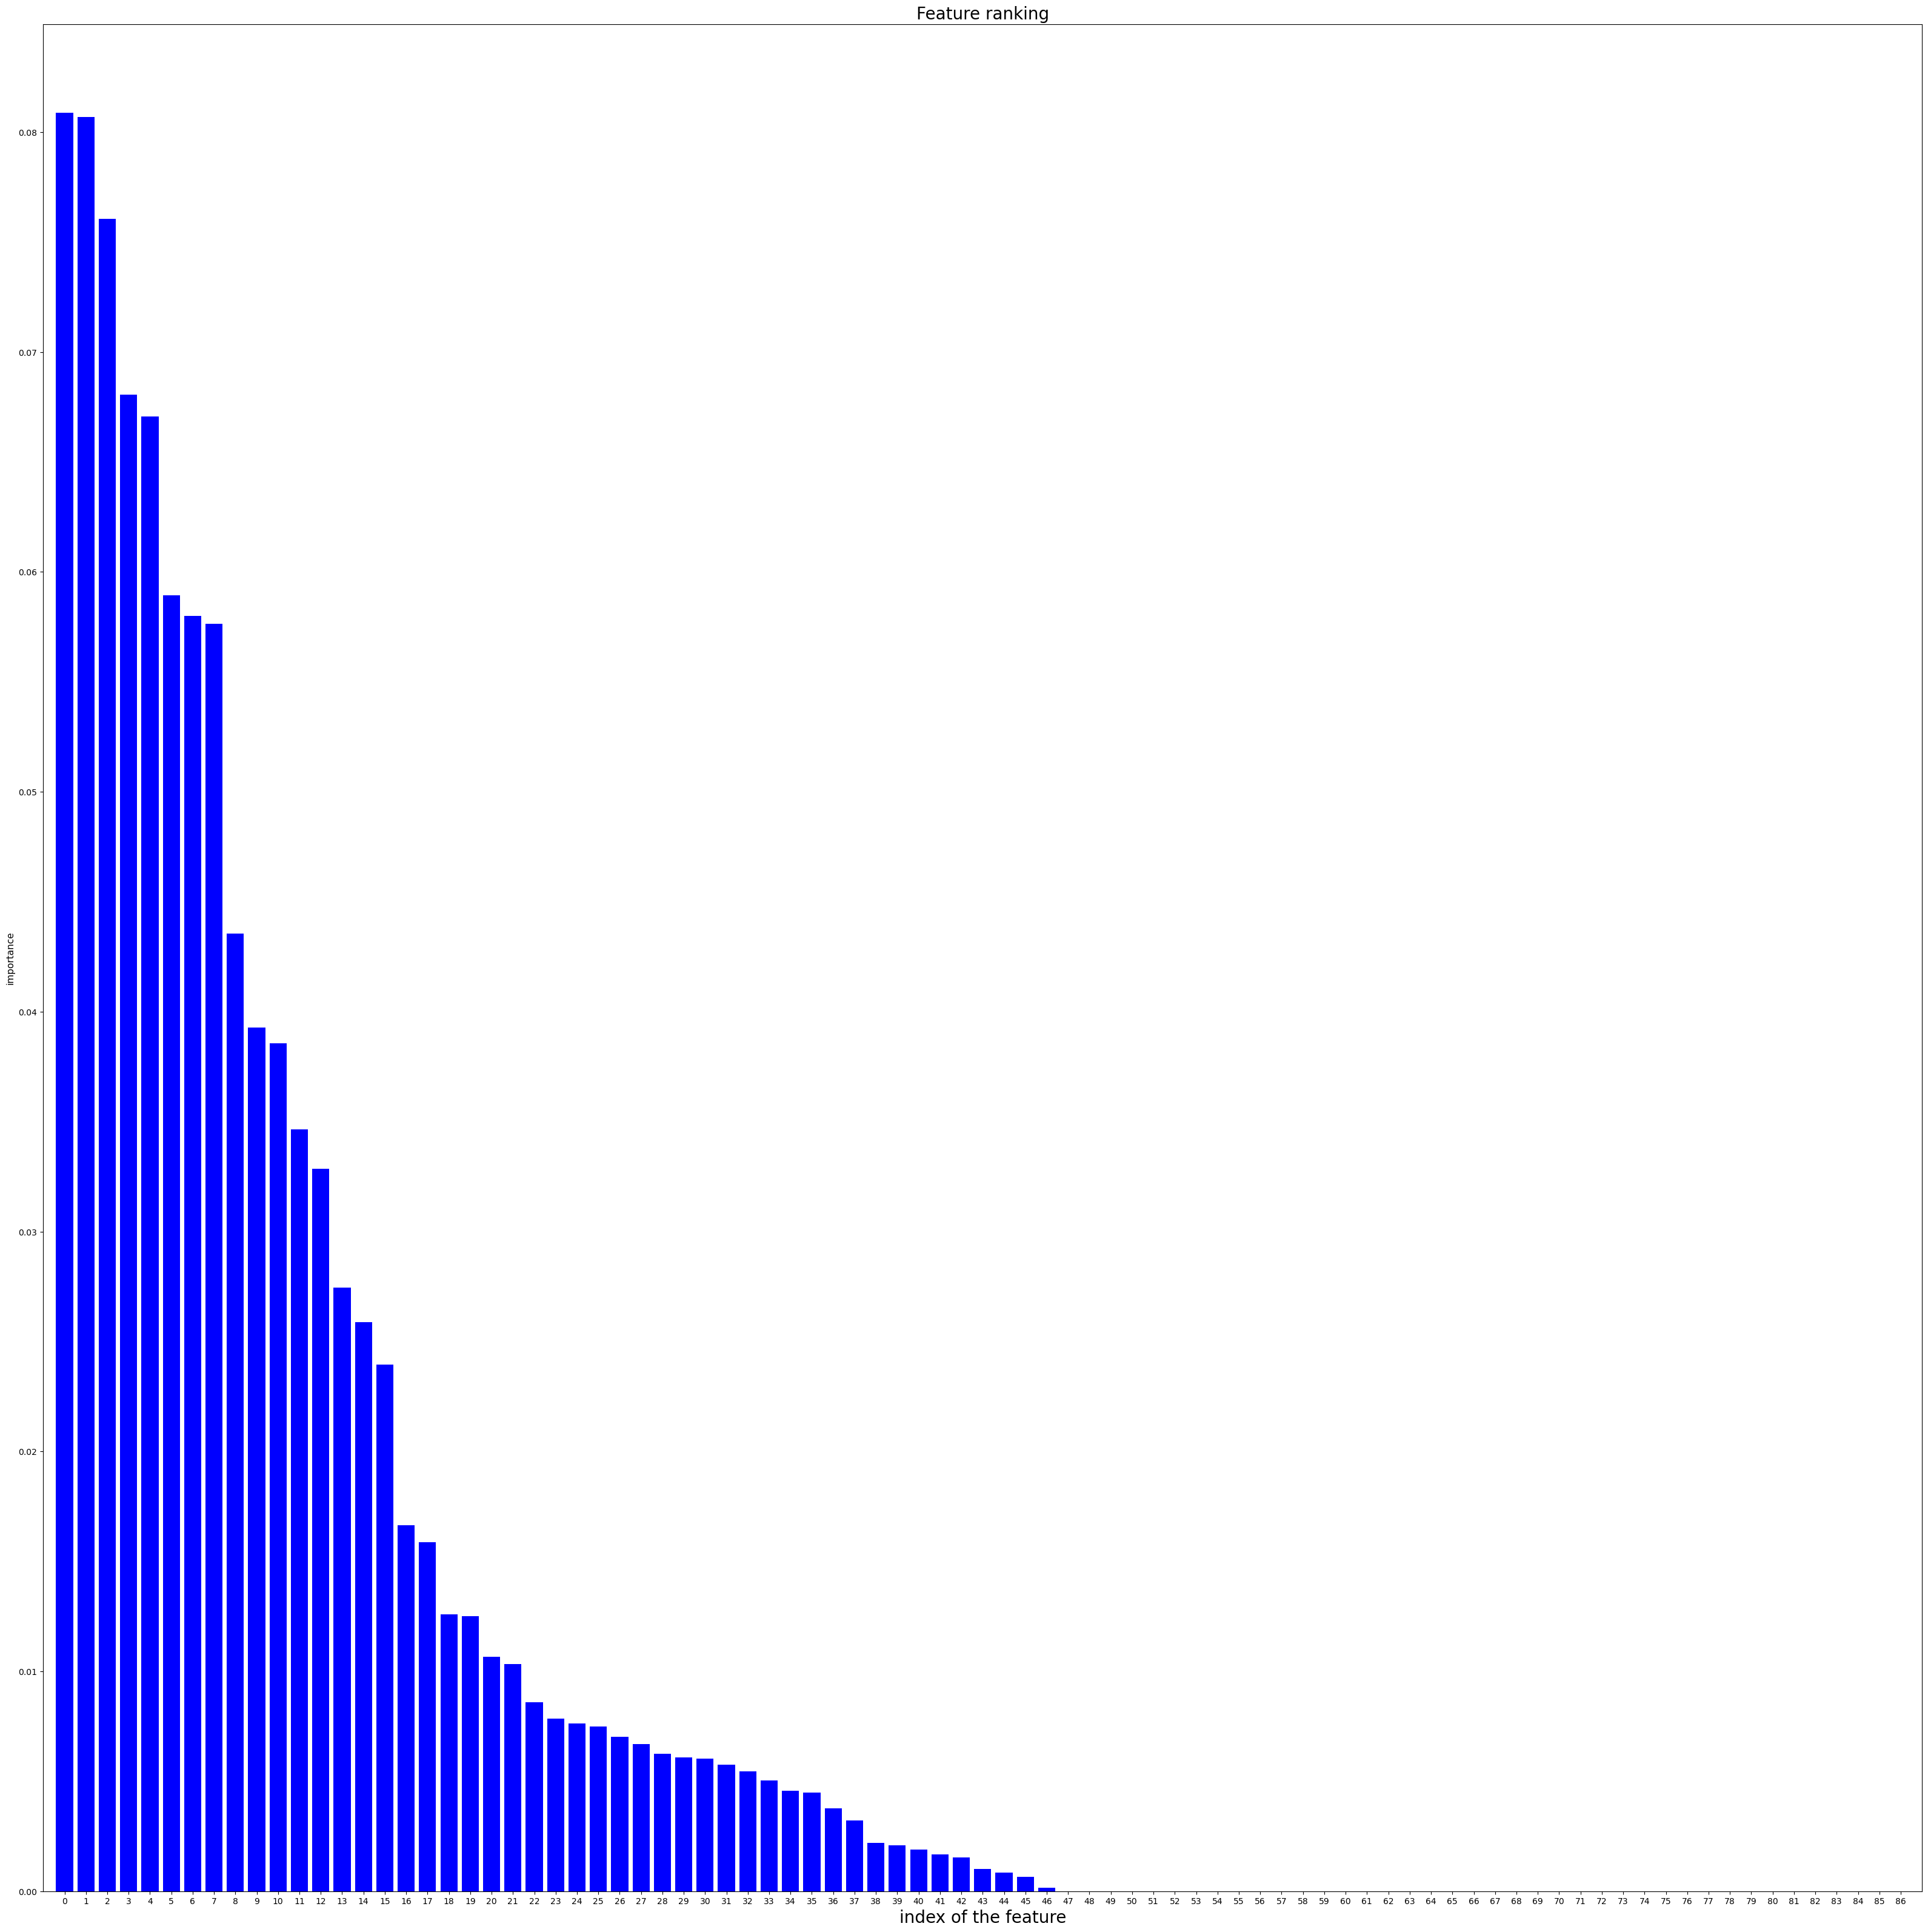

In [167]:
importances= dt_model.feature_importances_
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(x.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))
    
f, ax = plt.subplots(figsize=(40,40))
plt.title("Feature ranking", fontsize = 20)
plt.bar(range(x_train.shape[1]), importances[indices],
    color="b", 
    align="center")
plt.xticks(range(x_train.shape[1]))
plt.xlim([-1, x_train.shape[1]])
plt.ylabel("importance", fontsize = 11)
plt.xlabel("index of the feature", fontsize = 20)

In [168]:
"""param_dist = {'max_depth': [2,3,4],
              'bootstrap': [True, False],
              'max_features': ['auto', 'sqrt', 'log2', None],
              'criterion': ['gini', 'entropy']
             }
cv_dt=RandomForestClassifier()
grid=GridSearchCV(cv_dt, param_grid=param_dist, cv=17)
grid.fit(x_test, y_test)
grid.best_params_"""

"param_dist = {'max_depth': [2,3,4],\n              'bootstrap': [True, False],\n              'max_features': ['auto', 'sqrt', 'log2', None],\n              'criterion': ['gini', 'entropy']\n             }\ncv_dt=RandomForestClassifier()\ngrid=GridSearchCV(cv_dt, param_grid=param_dist, cv=17)\ngrid.fit(x_test, y_test)\ngrid.best_params_"

In [169]:
cv_rf=RandomForestClassifier()

In [170]:
"""# OOB Rate

cv_rf.set_params(warm_start=True, 
                  oob_score=True)

min_estimators = 15
max_estimators = 1000

error_rate = {}

for i in range(min_estimators, max_estimators + 1):
    cv_rf.set_params(n_estimators=i)
    cv_rf.fit(x_test, y_test)
    
    oob_error = 1 - cv_rf.oob_score_
    error_rate[i] = oob_error"""

'# OOB Rate\n\ncv_rf.set_params(warm_start=True, \n                  oob_score=True)\n\nmin_estimators = 15\nmax_estimators = 1000\n\nerror_rate = {}\n\nfor i in range(min_estimators, max_estimators + 1):\n    cv_rf.set_params(n_estimators=i)\n    cv_rf.fit(x_test, y_test)\n    \n    oob_error = 1 - cv_rf.oob_score_\n    error_rate[i] = oob_error'

In [171]:
# Convert dictionary to a pandas series for easy plotting 

# oob_series=pd.Series(error_rate)

In [172]:
"""fig, ax = plt.subplots(figsize=(10,10))

ax.set_facecolor('#fafafa')

oob_series.plot(kind='line', color='red')
plt.axhline(0.055, color='#875FDB', linestyle='--')
plt.axhline(0.05, color='#875FDB', linestyle='--')
plt.xlabel('n_estimators')
plt.ylabel('OOB Error Rate')
plt.title('OOB Error Rate Across various Forest sizes \n(From 15 to 1000 trees)')"""

"fig, ax = plt.subplots(figsize=(10,10))\n\nax.set_facecolor('#fafafa')\n\noob_series.plot(kind='line', color='red')\nplt.axhline(0.055, color='#875FDB', linestyle='--')\nplt.axhline(0.05, color='#875FDB', linestyle='--')\nplt.xlabel('n_estimators')\nplt.ylabel('OOB Error Rate')\nplt.title('OOB Error Rate Across various Forest sizes \n(From 15 to 1000 trees)')"

In [173]:
# Creating model using RandomForest

rf_model=RandomForestClassifier(criterion='gini', max_depth=4,
                                max_features=None, min_samples_leaf=20,
                                min_samples_split=20, n_jobs=3,
                               bootstrap=True, n_estimators = 600,
                               oob_score=False, warm_start=False)
rf_model.fit(x_train, y_train)
rf_model_train_score=rf_model.score(x_train, y_train)
print('Training Score is: ', rf_model_train_score)
rf_model_test_score=rf_model.score(x_test, y_test)
print('Testing score is: ', rf_model_test_score)

Training Score is:  0.6734010052232187
Testing score is:  0.6661411115490737


In [174]:
pridictions_rf = rf_model.predict(x_test)
pridictions_rf

array([1, 0, 0, ..., 1, 0, 1], dtype=int64)

In [175]:
def create_conf_mat(test_class_set, predictions):
    """Function returns confusion matrix comparing two arrays"""
    if (len(test_class_set.shape) != len(predictions.shape) == 1):
        return print('Arrays entered are not 1-D.\nPlease enter the correctly sized sets.')
    elif (test_class_set.shape != predictions.shape):
        return print('Number of values inside the Arrays are not equal to each other.\nPlease make sure the array has the same number of instances.')
    else:
        # Set Metrics
        test_crosstb_comp = pd.crosstab(index = test_class_set,
                                        columns = predictions)
        # Changed for Future deprecation of as_matrix
        test_crosstb = test_crosstb_comp.values
        return test_crosstb

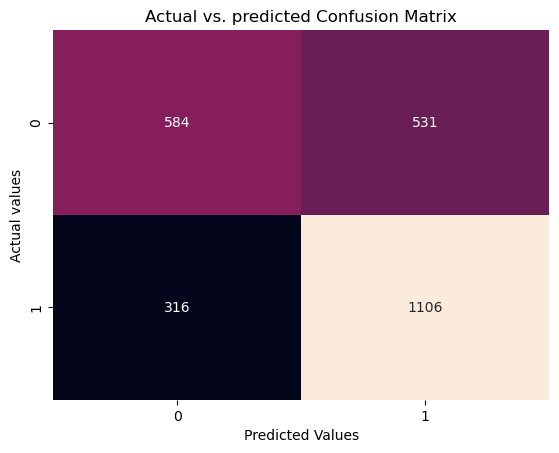

In [176]:
conf_mat= create_conf_mat(y_test, pridictions_rf)

sns.heatmap(conf_mat, annot= True, fmt='d', cbar= False)
plt.xlabel('Predicted Values')
plt.ylabel('Actual values')
plt.title('Actual vs. predicted Confusion Matrix')
plt.show()

In [177]:
y_pred_prob=rf_model.predict_proba(x_test)[:, 1]
y_pred=rf_model.predict(x_test)

In [178]:
# Model Accuracy
print ('Model Accuracy is: ', (rf_model.score(x_test, y_test))*100)

#Recall Accuracy
print('Model recall is: ', (recall_score(y_test, y_pred))*100)

Model Accuracy is:  66.61411115490738
Model recall is:  77.77777777777779


In [179]:
# Area under Curve

fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_prob)
roc_auc_rf=auc(fpr_rf, tpr_rf)

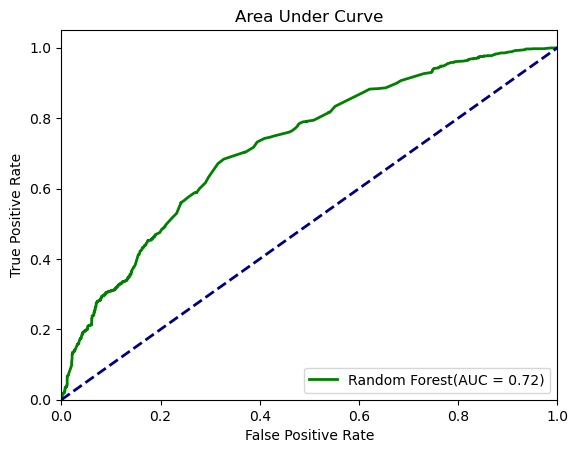

In [180]:
plt.figure(1)
lw = 2
plt.plot(fpr_rf, tpr_rf, color='green',
         lw=lw, label='Random Forest(AUC = %0.2f)' % roc_auc_rf)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Area Under Curve')
plt.legend(loc="lower right")
plt.show()

In [181]:
# Creating model using Logistic Regression

from sklearn.linear_model import LogisticRegression

lr_model=LogisticRegression(C=0.4, max_iter=1000, solver='liblinear')
lr_model.fit(x_train, y_train)
lr_model_train_score=lr_model.score(x_train, y_train)
print('Training Score is: ', lr_model_train_score)
lr_model_test_score=lr_model.score(x_test, y_test)
print('Testing score is: ', lr_model_test_score)

Training Score is:  0.6970533162511087
Testing score is:  0.6807252660622782


In [182]:
y_pred_prob_lr=lr_model.predict_proba(x_test)[:, 1]
y_pred_lr=lr_model.predict(x_test)

In [183]:
# Model Accuracy
print ('Model Accuracy is: ', (lr_model.score(x_test, y_test))*100)

#Recall Accuracy
print('Model recall is: ', (recall_score(y_test, y_pred_lr))*100)

Model Accuracy is:  68.07252660622783
Model recall is:  75.8790436005626


In [184]:
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_pred_prob_lr)
roc_auc_lr=auc(fpr_lr, tpr_lr)

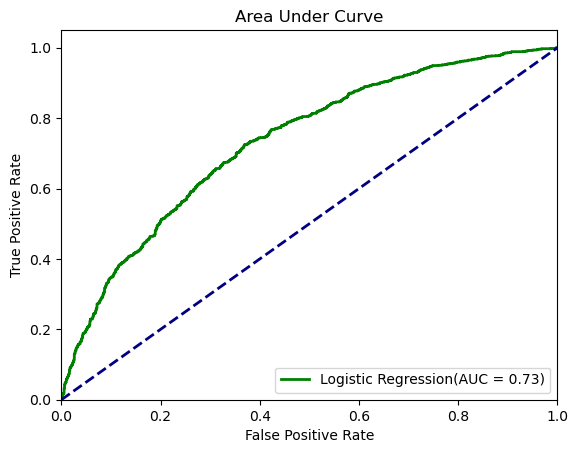

In [185]:
plt.figure(1)
lw = 2
plt.plot(fpr_lr, tpr_lr, color='green',
         lw=lw, label='Logistic Regression(AUC = %0.2f)' % roc_auc_lr)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Area Under Curve')
plt.legend(loc="lower right")
plt.show()

In [186]:
pridictions_lr=lr_model.predict(x_test)

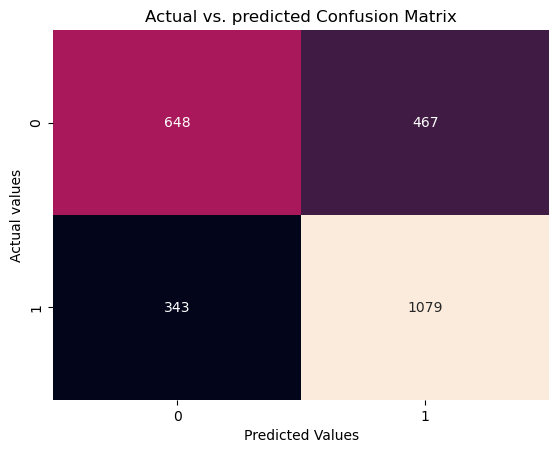

In [187]:
conf_mat= create_conf_mat(y_test, pridictions_lr)

sns.heatmap(conf_mat, annot= True, fmt='d', cbar= False)
plt.xlabel('Predicted Values')
plt.ylabel('Actual values')
plt.title('Actual vs. predicted Confusion Matrix')
plt.show()

In [188]:
# Creating model using ada booster

from sklearn.ensemble import AdaBoostClassifier

ada_model=AdaBoostClassifier(random_state=17)
ada_model.fit(x_train, y_train)
ada_model_train_score=ada_model.score(x_train, y_train)
print('Training Score is: ', ada_model_train_score)
ada_model_test_score=ada_model.score(x_test, y_test)
print('Testing score is: ', ada_model_test_score)

Training Score is:  0.6925199566374298
Testing score is:  0.67836026803311


In [189]:
# Creating model using gradient booster

from sklearn.ensemble import GradientBoostingClassifier

gb_model=GradientBoostingClassifier(random_state=17, n_estimators=10,
                                   criterion='squared_error')
gb_model.fit(x_train, y_train)
gb_model_train_score=gb_model.score(x_train, y_train)
print('Training Score is: ', gb_model_train_score)
gb_model_test_score=gb_model.score(x_test, y_test)
print('Testing score is: ', gb_model_test_score)

Training Score is:  0.6684734404257416
Testing score is:  0.6590461174615688


In [190]:
# Creating model using KNN

from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()

knn.fit(x_train, y_train)
knn_train_score=knn.score(x_train, y_train)
print('Training Score is: ', knn_train_score)
knn_test_score=knn.score(x_test, y_test)
print('Testing score is: ', knn_test_score)

Training Score is:  0.7901842909234257
Testing score is:  0.6610169491525424


In [191]:
pred_dt=dt_model.predict(x_test)
pred_rf=rf_model.predict(x_test)
pred_lr=lr_model.predict(x_test)
pred_ada=ada_model.predict(x_test)
pred_gb=gb_model.predict(x_test)
pred_knn=knn.predict(x_test)

            Method Used  Accuracy
0   Logistic Regression  0.680725
1         Decision Tree  0.687032
2     RandomForest Gini  0.743004
3  RandomForest Entropy  0.743792
4        Support Vector  0.737091
5   K Nearest Neighbors  0.661017
6            GuassionNB  0.615688
7           BernoulliNB  0.658258
8     Voting Classifier  0.734332
AxesSubplot(0.125,0.11;0.775x0.77)


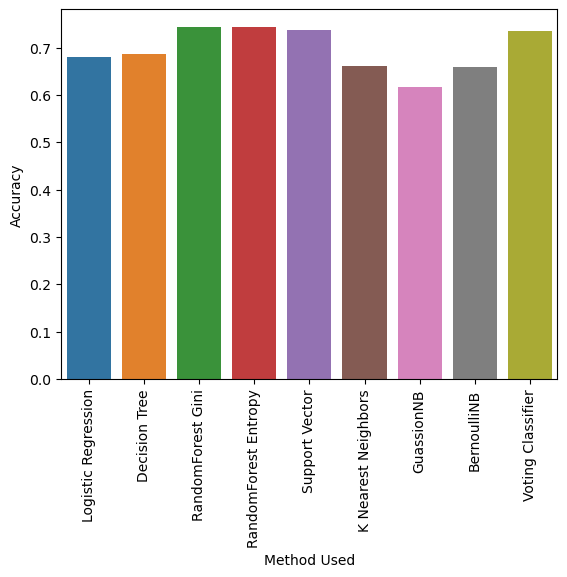

In [192]:
list_met = []
list_accuracy = []

# Model 1
# Logistic Regression
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(C=0.4, max_iter=1000, solver='liblinear')
lr = classifier.fit(x_train, y_train)
# Prediction
y_pred = classifier.predict(x_test)
# Accuarcy
accuracy_LR = accuracy_score(y_test, y_pred)

# Model 2
from sklearn.tree import DecisionTreeClassifier
classifier2 = DecisionTreeClassifier(random_state=14)
dt = classifier2.fit(x_train, y_train)
# prediction
y_pred2 = classifier2.predict(x_test)
# evaluation
accuracy_DT = accuracy_score(y_test, y_pred2)

# Model 3 
# criteria - gini
from sklearn.ensemble import RandomForestClassifier
classifier3 = RandomForestClassifier(random_state=14)
rfi = classifier3.fit(x_train, y_train)
#prediction
y_pred3 = classifier3.predict(x_test)
# evaluation
accuracy_RFI = accuracy_score(y_test, y_pred3)

# Model 4
classifier4 = RandomForestClassifier(criterion='entropy', random_state=14)
rfe = classifier4.fit(x_train, y_train)
# predict
y_pred4 = classifier4.predict(x_test)
# evaluation
accuracy_RFE = accuracy_score(y_test, y_pred4)

# Model 5
from sklearn.svm import SVC

model_svm = SVC()
SVM = model_svm.fit(x_train, y_train)
#prediction
y_pred5 = model_svm.predict(x_test)
# evaluation
accuracy_SVC = accuracy_score(y_test, y_pred5)

# Model 6
from sklearn.neighbors import KNeighborsClassifier
model_knn = KNeighborsClassifier()
knn = model_knn.fit(x_train, y_train)
#prediction
pred_knn = model_knn.predict(x_test)
# evaluation
accuracy_knn = accuracy_score(y_test, pred_knn)

# model 7
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb = gnb.fit(x_train, y_train)
# prediction
pred_gnb = gnb.predict(x_test)
# evaluation
accuracy_GNB = accuracy_score(y_test, pred_gnb)

# model 8
from sklearn.naive_bayes import BernoulliNB
model = BernoulliNB()
bnb = model.fit(x_train, y_train)
# prediction
pred_bnb = bnb.predict(x_test)
# evaluation
accuracy_BNB = accuracy_score(y_test, pred_bnb)

# combining all the above model by using voting classifier model

from sklearn.ensemble import VotingClassifier

evc = VotingClassifier(estimators = [('lr', lr), ('DT', dt), ('RFI', rfi),('RFE', rfe),
                                     ('SVC', SVM), ('KNN', knn),('GNB', gnb),
                                    ('BNB', bnb)], voting = 'hard',
                                    flatten_transform=True)
model_evc = evc.fit(x_train, y_train)
# prediction
pred_evc = evc.predict(x_test)
# evaluation
accuracy_evc = accuracy_score(y_test, pred_evc)

list1 = ["Logistic Regression",'Decision Tree','RandomForest Gini', 'RandomForest Entropy',
        'Support Vector','K Nearest Neighbors','GuassionNB','BernoulliNB','Voting Classifier']

list2 = [accuracy_LR,accuracy_DT,accuracy_RFI,accuracy_RFE,accuracy_SVC,accuracy_knn,
        accuracy_GNB,accuracy_BNB, accuracy_evc]

list3 = [classifier,classifier2,classifier3,classifier4,model_svm,model_knn,
        gnb,model,model_evc]

df_accuracy = pd.DataFrame({'Method Used' :list1, "Accuracy" :list2})
print(df_accuracy)

charts = sns.barplot(x='Method Used', y = 'Accuracy', data=df_accuracy)
charts.set_xticklabels(charts.get_xticklabels(), rotation=90)
print(charts)

In [196]:
model_evc = evc.fit(x_train, y_train)
# prediction
pred_evc = evc.predict(x_test)
# evaluation
accuracy_evc = accuracy_score(y_test, pred_evc)
print(accuracy_evc)

0.73433188805676


In [193]:
print('F-1 Score: ', (f1_score(y_test, pred_evc, average='micro')))
print('Precision Score: ', (f1_score(y_test, pred_evc, average='micro')))
print('Recall Score: ', (f1_score(y_test, pred_evc, average='micro')))

F-1 Score:  0.73433188805676
Precision Score:  0.73433188805676
Recall Score:  0.73433188805676


In [198]:
pridiction_evc=model_evc.predict(x_test)

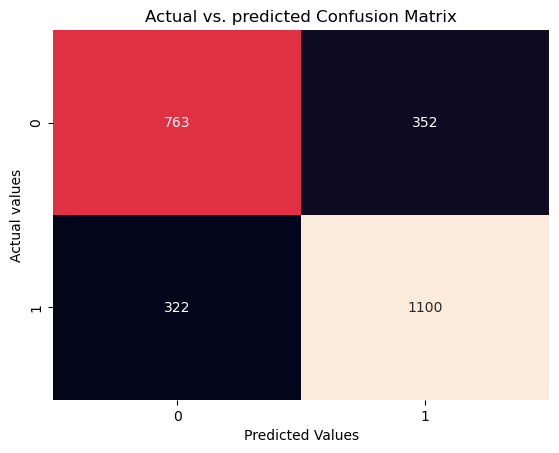

In [199]:
conf_mat= create_conf_mat(y_test, prediction_evc)

sns.heatmap(conf_mat, annot= True, fmt='d', cbar= False)
plt.xlabel('Predicted Values')
plt.ylabel('Actual values')
plt.title('Actual vs. predicted Confusion Matrix')
plt.show()